<a href="https://colab.research.google.com/github/DzikriNurRochim/Data_science/blob/master/Customer_Shipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Explanation
A. Source:

https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

B. Content

This dataset encompasses various features related to customer shopping preferences, gathering essential information for businesses seeking to enhance their understanding of their customer base. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

C. Dataset Glossary (Column-wise)

1. Customer ID - Unique identifier for each customer
Age - Age of the customer

2. Gender - Gender of the customer (Male/Female)

3. Item Purchased - The item purchased by the customer

4. Category - Category of the item purchased

5. Purchase Amount (USD) - The amount of the purchase in USD

6. Location - Location where the purchase was made

7. Size - Size of the purchased item

8. Color - Color of the purchased item

9. Season - Season during which the purchase was made

10. Review Rating - Rating given by the customer for the purchased item

11. Subscription Status - Indicates if the customer has a subscription (Yes/No)

12. Shipping Type - Type of shipping chosen by the customer

13. Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)

14. Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)

15. Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction

16. Payment Method - Customer's most preferred payment method

17. Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

Structure of the Dataset

Acknowledgement

This dataset is a synthetic creation generated using ChatGPT to simulate a realistic customer shopping experience. Its purpose is to provide a platform for beginners and data enthusiasts, allowing them to create, enjoy, practice, and learn from a dataset that mirrors real-world customer shopping behavior. The aim is to foster learning and experimentation in a simulated environment, encouraging a deeper understanding of data analysis and interpretation in the context of consumer preferences and retail scenarios.

# Purpose:
1. make inventory and assortment decisions.

2. Identify best selling combinations to optimize inventory.

3. Analyze relationship between review ratings and repeat purchases. Can indicate customer satisfaction and help manage product quality.



# Question
1. what season is peak for customer buy the product?

2. what is the overall review rating of the product?

3. what the best product is? how about review rating and segmentation?

4. What is the repeat purchase rate for customers who gave a 4+ star review rating compared to those who gave lower ratings? This analyzes if higher customer satisfaction correlates to more repeat purchases.

5. What are the top 5 item color and size combinations by total purchase amount? Knowing the best selling combinations can help optimize inventory levels.

6. What categories have the highest average order value? This identifies the most profitable categories to focus on.

7. What is the sales contribution percentage by payment method? It's important to know the payment method split.

8. What is the average order value by location? Can help optimize inventory by location.

9. What is the repeat vs new customer purchase split by season? Can indicate opportunities to focus marketing to new vs existing customers.

10. What categories have the highest review ratings on average? Helps identify strengths to leverage and weaknesses to improve.

11. What are the top 10 categories by total purchase amount? This helps identify the highest selling categories to prioritize inventory.

12. What is the average purchase amount by category and season? This can reveal trends to optimize assortment planning and inventory levels by season.

13. What percentage of purchases were made using a promo code versus not using one? This indicates how effective promotions are at driving sales.


## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency # to do chi-test
from scipy.stats import f_oneway # to do ANOVA pairwise

## Read the dataset

In [2]:
data=pd.read_excel("/content/shopping_trend_processed.xlsx")
data

,Customer ID,Age,Age_Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Middle,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Young,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Middle,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Young,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Middle,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Middle,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Middle,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Middle,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Middle,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## Checking the dataset

### Check type of columns in the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

### Checking Null Values

In [4]:
data.isnull().any()

Customer ID               False
Age                       False
Age_Groups                False
Gender                    False
Item Purchased            False
Category                  False
Purchase Amount (USD)     False
Location                  False
Size                      False
Color                     False
Season                    False
Review Rating             False
Subscription Status       False
Shipping Type             False
Discount Applied          False
Promo Code Used           False
Previous Purchases        False
Payment Method            False
Frequency of Purchases    False
dtype: bool

### Checking the statistics summary

In [5]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Bivariate Analysis

###customer id columns

In [6]:
data['Customer ID'].nunique()

3900

based on `data.describe` show customer id is 3900 then checked again using `data['Customer ID'].nunique()` show 3900 its mean every customer id is unique

### Age Groups Columns

In [7]:
data['Age_Groups'].unique()

array(['Middle', 'Young', 'Old'], dtype=object)

In [8]:
data['Age_Groups'].value_counts()

Middle    2160
Young     1313
Old        427
Name: Age_Groups, dtype: int64

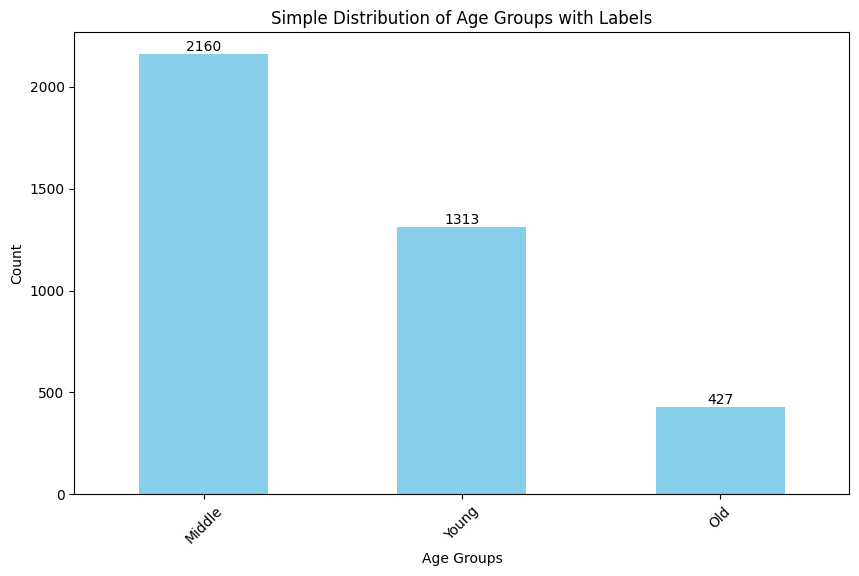

In [9]:
age_group_counts=data['Age_Groups'].value_counts()
# Creating a simple bar plot with value labels
plt.figure(figsize=(10, 6))
ax = age_group_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of Age Groups with Labels')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()


show that `Age_Groups` contain of Young, Middle, and Old.

1313 customer is young

2150 customer is middle

427 customer is old


### Item Purchased

In [10]:
data['Item Purchased'].nunique()

25

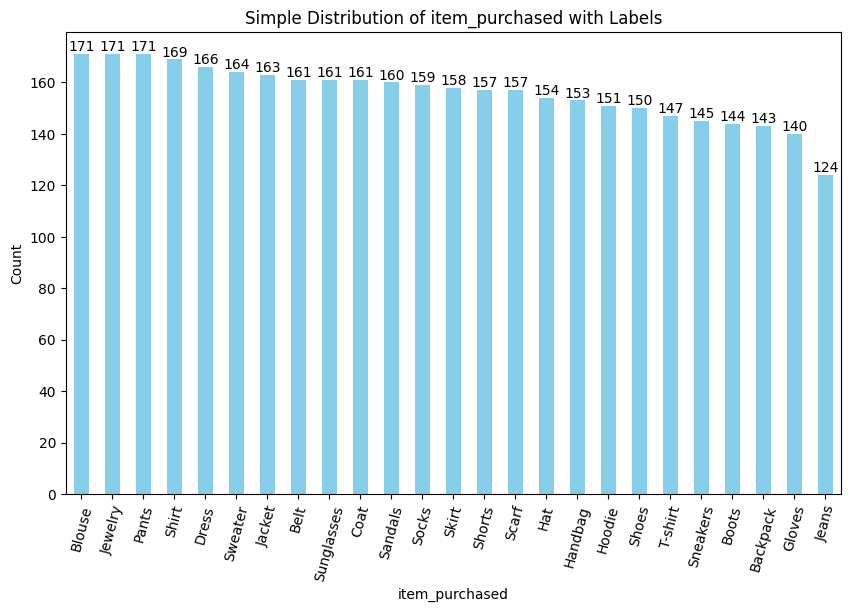

In [11]:
item_purchased_counts=data['Item Purchased'].value_counts()
plt.figure(figsize=(10, 6))
ax = item_purchased_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of item_purchased with Labels')
plt.xlabel('item_purchased')
plt.ylabel('Count')
plt.xticks(rotation=75)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()

Top 5 item purchased:

1. Blouse with 171 item sold

2. Jewelry with 171 item sold

3. Pants with 171 item sold

4. Shirt with 169 item sold

5. Dress with 166 item sold


Bottom 5 item purchased:

1. Jeans with 124 item purchased

2. Gloves with 140 item purchased

3. Backpack with 143 item purchased

4. Boots with 144 item purchased

5. Sneakers with 145 item purchased


### Category

In [12]:
data['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

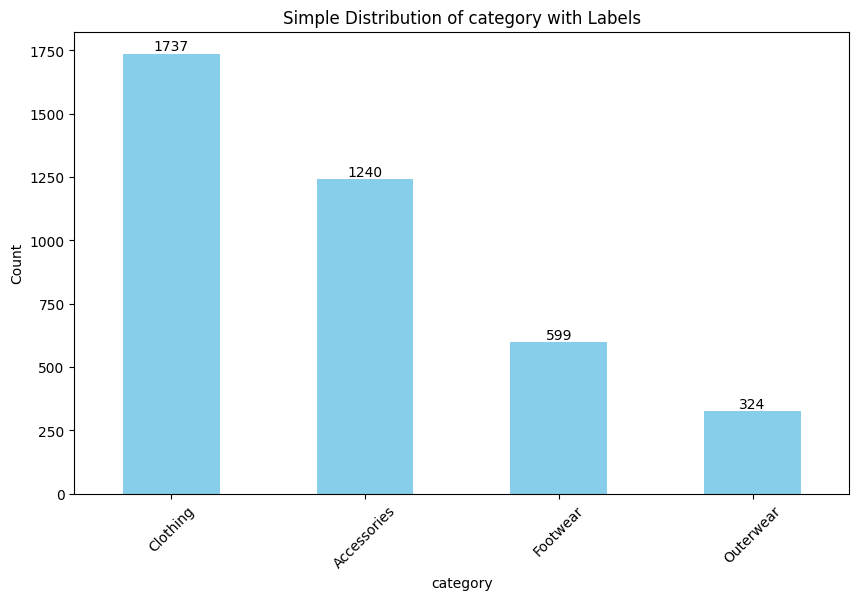

In [13]:
category_counts=data['Category'].value_counts()
plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of category with Labels')
plt.xlabel('category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()

Barchart  sort by high to low values

1. Clothing

2. Accessories

3. Footwear

4. Outerwear

it shows that customer love to bought clothing and accessories than footwear and outerwear.

### Gender

In [14]:
data['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

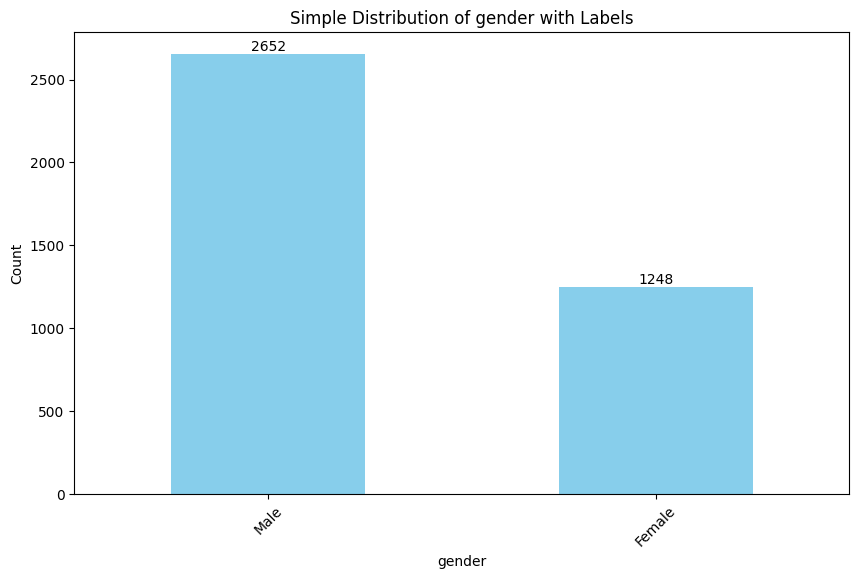

In [15]:
gender_counts=data['Gender'].value_counts()
plt.figure(figsize=(10, 6))
ax = gender_counts.plot(kind='bar', color='skyblue')

plt.title('Simple Distribution of gender with Labels')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Display the plot
plt.show()

### Purchase Amount

In [16]:
purchase_counts=data['Purchase Amount (USD)'].value_counts()
purchase_counts.nunique()

27

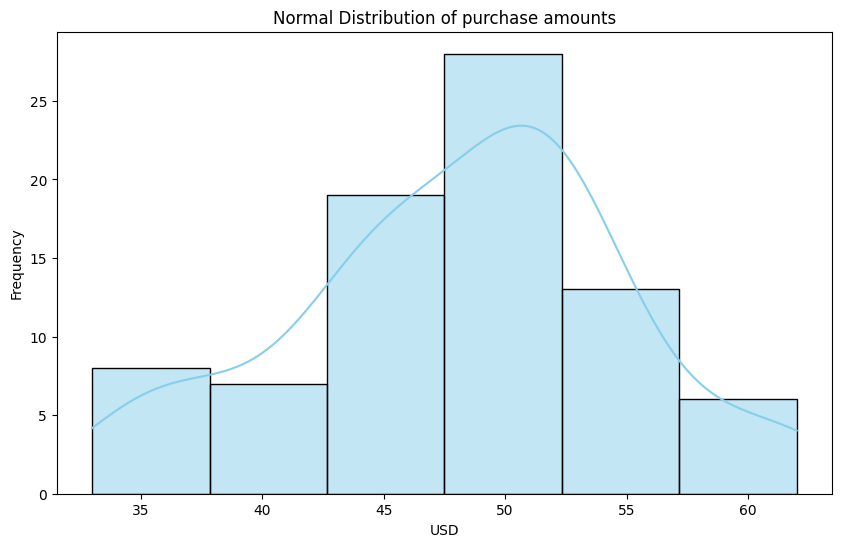

In [17]:

# Example: Plotting the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(purchase_counts, kde=True, color='skyblue',bins=6)

plt.title('Normal Distribution of purchase amounts')
plt.xlabel('USD')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Location

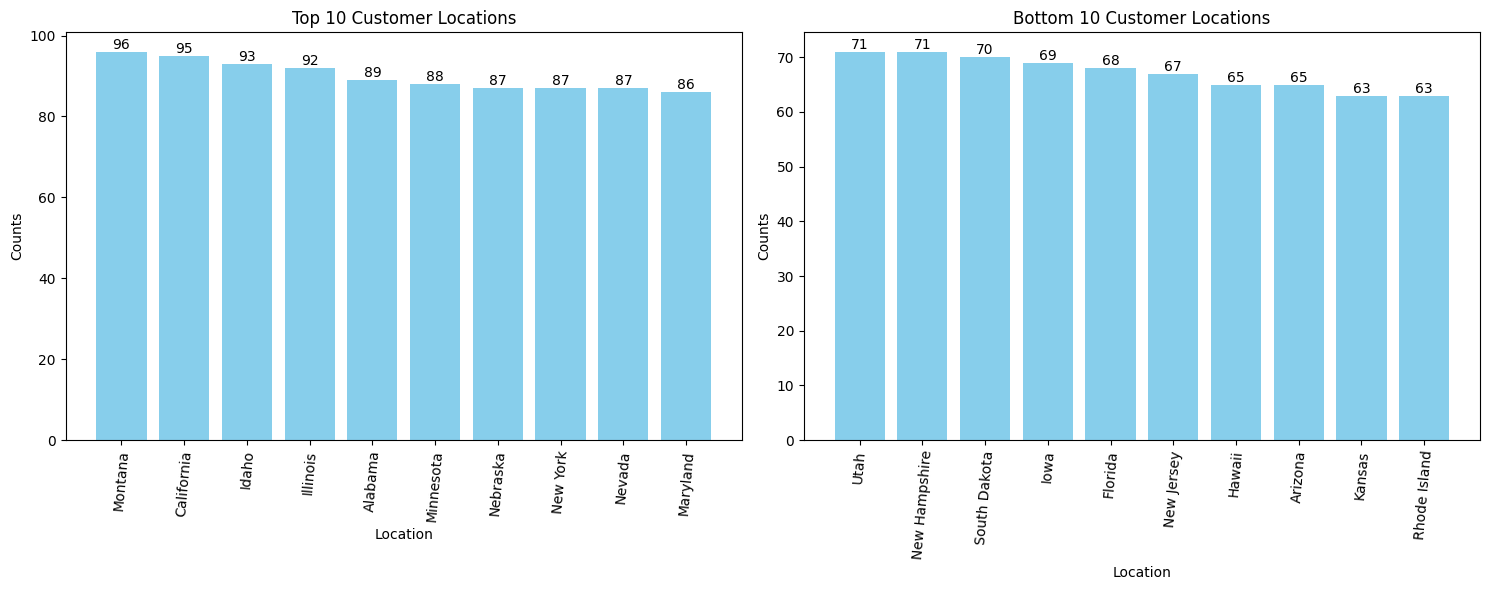

In [18]:


location_counts = data['Location'].value_counts().sort_values(ascending=False)
top_10 = location_counts.head(10)
bottom_10 = location_counts.tail(10)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 locations on the left subplot
ax1.bar(top_10.index, top_10.values, color='skyblue')
ax1.set_title('Top 10 Customer Locations')
ax1.set_xlabel('Location')
ax1.set_ylabel('Counts')
ax1.tick_params(axis='x', rotation=85)

# Adding value labels to each bar in the left subplot
for p in ax1.patches:
  ax1.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Plot the bottom 10 locations on the right subplot
ax2.bar(bottom_10.index, bottom_10.values, color='skyblue')
ax2.set_title('Bottom 10 Customer Locations')
ax2.set_xlabel('Location')
ax2.set_ylabel('Counts')
ax2.tick_params(axis='x', rotation=85)

# Adding value labels to each bar in the right subplot
for p in ax2.patches:
  ax2.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the subplots
plt.show()


Top 3 customer location:

1. Montana

2. California

3. idaho

Bottom 3 customer location:

1. Rhode Island

2. Kansas

3. Arizona


### Size

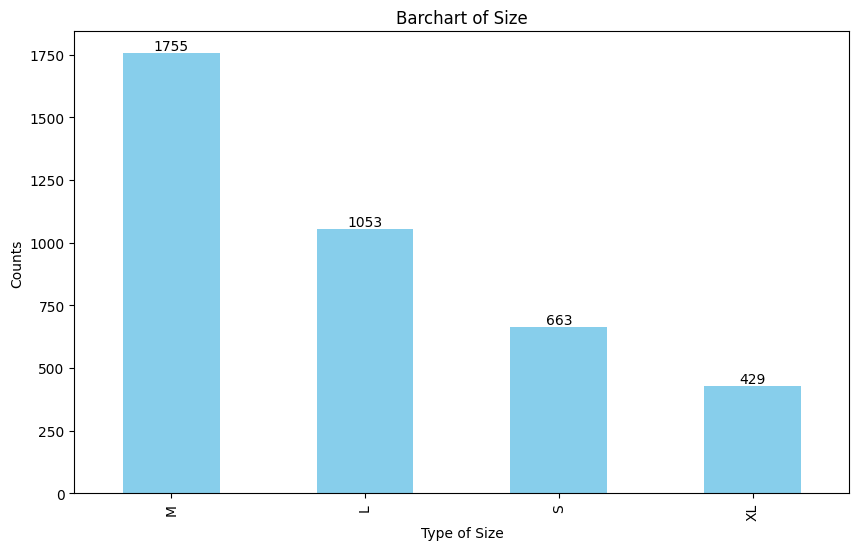

In [19]:
size_counts=data['Size'].value_counts()

plt.figure(figsize=(10, 6))
ax=size_counts.plot(kind='bar',color='Skyblue')

plt.title('Barchart of Size')
plt.ylabel('Counts')
plt.xlabel('Type of Size')

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

1. size M sold 1755 item

2. size L sold 1053 item

3. size S sold 663 item

4. size XL sold 429 item

### Color

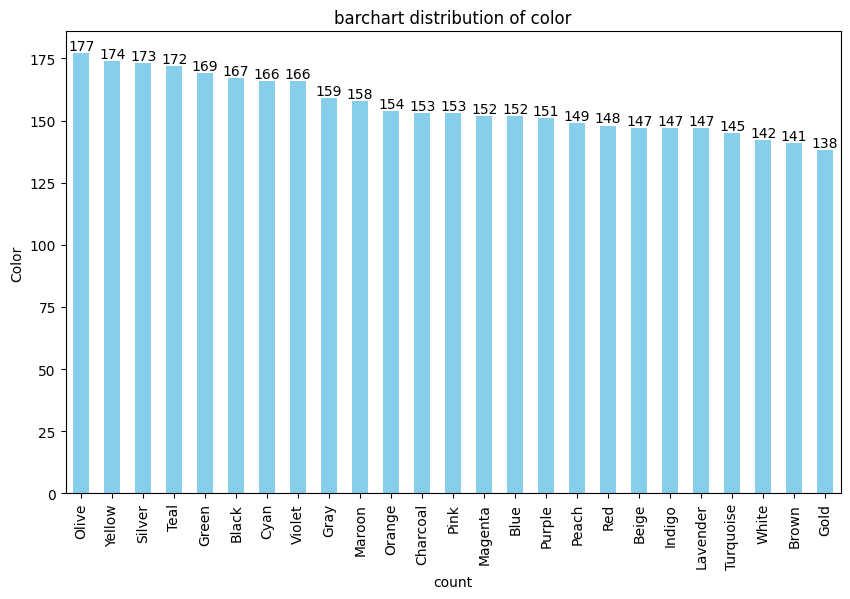

In [20]:
color_counts=data['Color'].value_counts()
plt.figure(figsize=(10,6))

ax=color_counts.plot(kind='bar',color='skyblue')

plt.title('barchart distribution of color')
plt.xlabel('count')
plt.ylabel('Color')

# Adding value labels to each bar
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

Top 3 color

1. Olive with 177

2. Yellow with 174

3. Silver with 173

Bottom 3:
1. Gold 138

2. Brown 141

3. White 142



In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

### Season

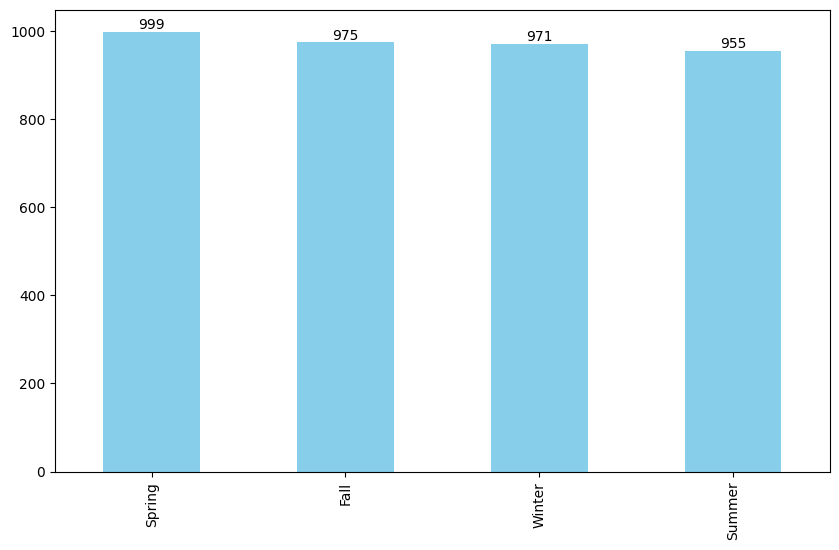

In [22]:
season_counts=data['Season'].value_counts()
plt.figure(figsize=(10,6))
ax=season_counts.plot(kind='bar',color='skyblue')
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

it show no specific difference amongs those. every season has its own customer, no seasonal peak of customer to buy

### Review Rating

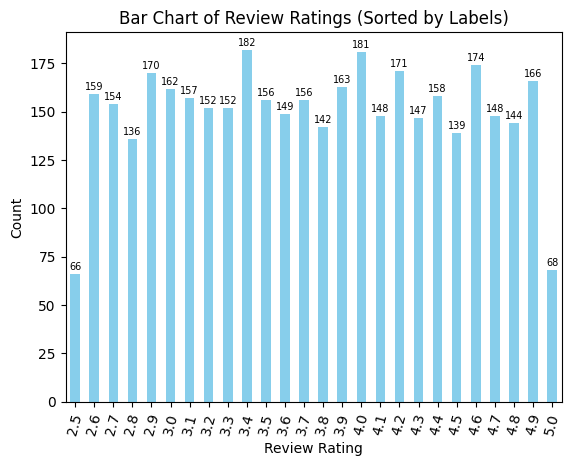

In [23]:
rr_counts=data['Review Rating'].value_counts()
# Sort the index (labels) of rr_counts
rr_counts_sorted = rr_counts.sort_index()

# Create a bar chart
ax = rr_counts_sorted.plot(kind='bar', color='skyblue')

# Set labels for the x-axis and y-axis
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(rotation=75)
# Set the title for the plot
plt.title('Bar Chart of Review Ratings (Sorted by Labels)')

for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Show the plot
plt.show()

In [24]:
rr_counts.sort_index()

2.5     66
2.6    159
2.7    154
2.8    136
2.9    170
3.0    162
3.1    157
3.2    152
3.3    152
3.4    182
3.5    156
3.6    149
3.7    156
3.8    142
3.9    163
4.0    181
4.1    148
4.2    171
4.3    147
4.4    158
4.5    139
4.6    174
4.7    148
4.8    144
4.9    166
5.0     68
Name: Review Rating, dtype: int64

### Subscription Status

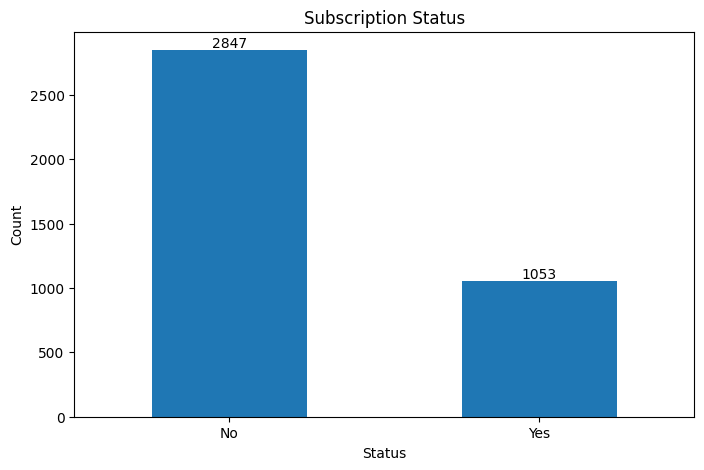

In [25]:
subs_counts=data['Subscription Status'].value_counts()
plt.figure(figsize=(8,5))

ax=subs_counts.plot(kind='bar')
plt.title('Subscription Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [26]:
subs_counts = data['Subscription Status'].value_counts()

# Calculate the total count
total_count = subs_counts.sum()

# Calculate the percentages
subs_counts

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

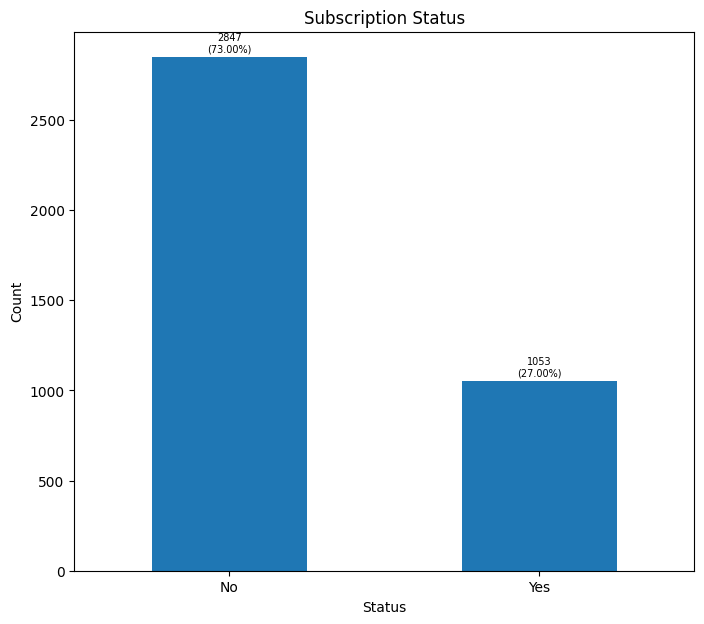

In [27]:

# Assuming 'Subscription Status' is a categorical variable in your DataFrame
subs_counts = data['Subscription Status'].value_counts()

# Calculate the total count
total_count = subs_counts.sum()

# Calculate the percentages
percentages = (subs_counts / total_count) * 100

# Create the bar chart
plt.figure(figsize=(8, 7))
ax = subs_counts.plot(kind='bar')
plt.title('Subscription Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Display percentages on top of the bars
plt.xticks(rotation=0)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height}\n({percentages[i]:.2f}%)',xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0,10),fontsize=7, textcoords='offset points')

plt.show()


it shows customer
1. do subscription with 1053 customer represent 27% of total customer

2. not subscription 2847 customer represent 73% of total customer

### Shipping Type

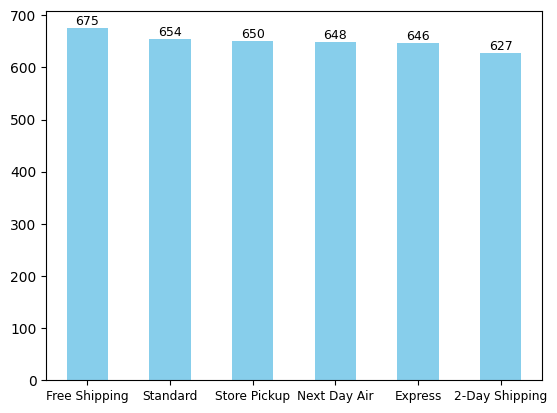

In [28]:
shipping_counts=data['Shipping Type'].value_counts()

ax=shipping_counts.plot(kind='bar',color='skyblue')
plt.xticks(rotation=0,fontsize=8.7)
for p in ax.patches:
  ax.annotate(text=str(p.get_height()),xy=(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center', va='center', xytext=(0, 5),fontsize=9, textcoords='offset points')
plt.show()


it shows no specific types of shipping customer to pick


### Discount Applied

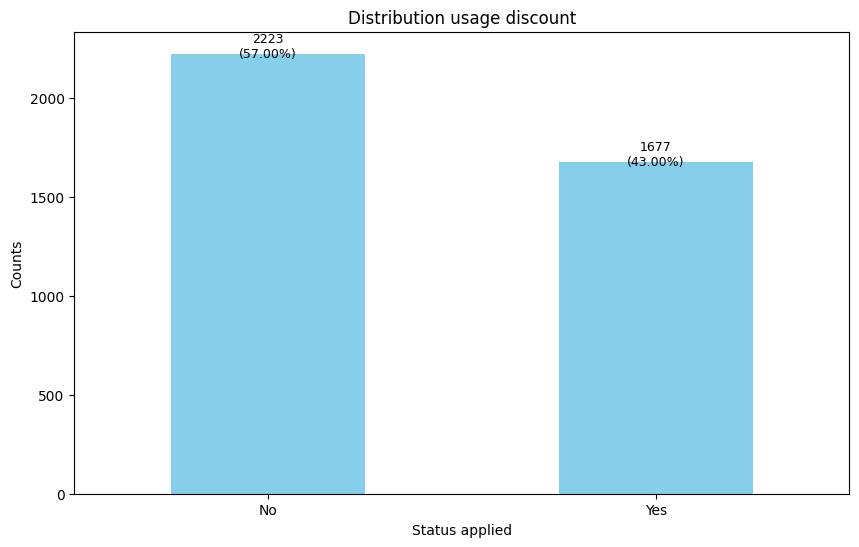

In [29]:
# create new variable
disc_counts=data['Discount Applied'].value_counts()
disc_percent=(disc_counts/disc_counts.sum())*100


#plotting
plt.figure(figsize=(10,6))
ax=disc_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution usage discount')
plt.xlabel('Status applied')
plt.ylabel('Counts')
plt.xticks(rotation=0)

#annotation
for i, p in enumerate(ax.patches):
    height=p.get_height()
    ax.annotate(f'{height}\n({disc_percent[i]:.2f}%)',xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',xytext=(0, 5),fontsize=9,textcoords='offset points')
plt.show()

it shows
1. 2223 customer represent 57% of customer didnt use discount

2. 1677 customer use discount its around 43% of total customer.

### Promo Code Used

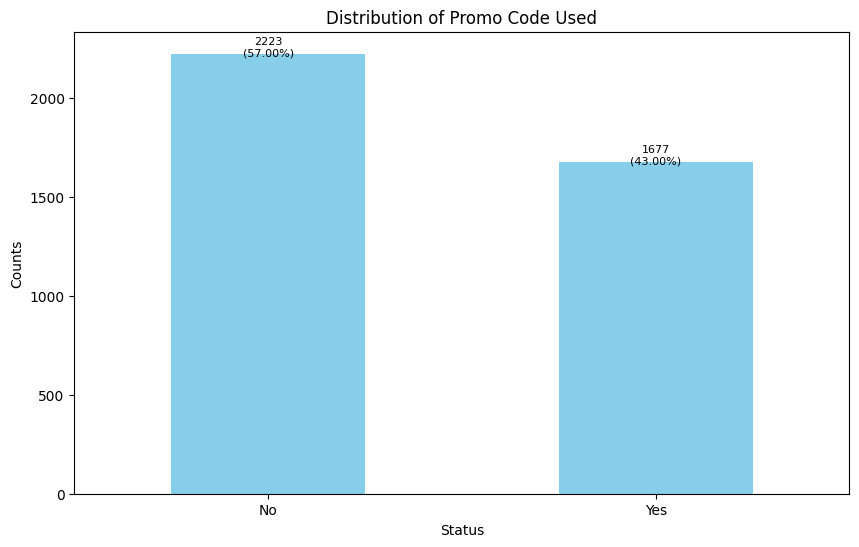

In [30]:
promo_counts=data['Promo Code Used'].value_counts()
promo_percent=(promo_counts/promo_counts.sum())*100

plt.figure(figsize=(10,6))
ax=promo_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution of Promo Code Used')
plt.xlabel('Status')
plt.ylabel('Counts')
plt.xticks(rotation=0)

#annotation
for i, p in enumerate(ax.patches):
    height=p.get_height()
    ax.annotate(f'{height}\n({promo_percent[i]:.2f}%)',xy=(p.get_x()+p.get_width()/2.,p.get_height()),
              ha='center',va='center',xytext=(0, 5),fontsize=8,textcoords='offset points')
plt.show()

#### Checking `Promo Code Used` to `Discount Applied` cause has same value

In [31]:

# Check if the two columns have the same values
are_columns_equal = data["Promo Code Used"].equals(data["Discount Applied"])

# Print the result
if are_columns_equal:
    print("Both columns have the same values.")
else:
    print("Columns have different values.")

Both columns have the same values.


### Previous Purchases

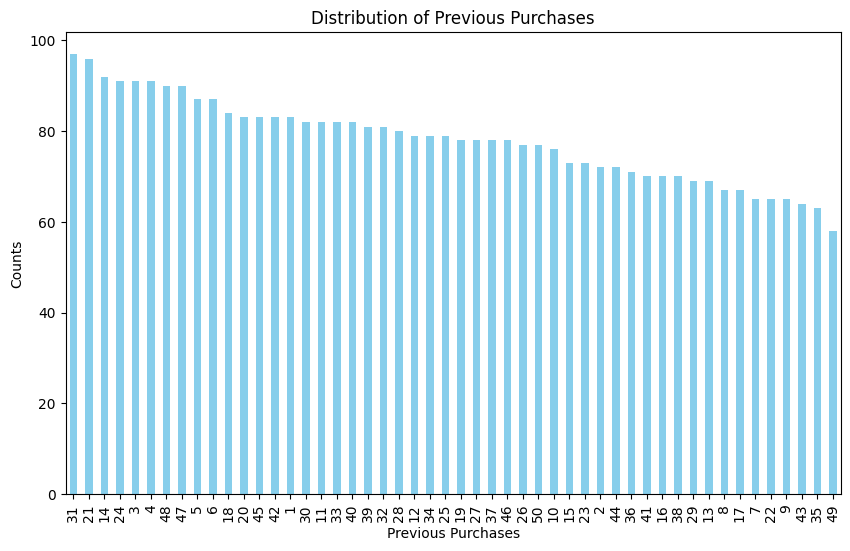

In [32]:
prev_counts=data['Previous Purchases'].value_counts()
prev_percent=(prev_counts/prev_counts.sum())*100

plt.figure(figsize=(10,6))
ax=prev_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution of Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Counts')
plt.show()

### Payment Method

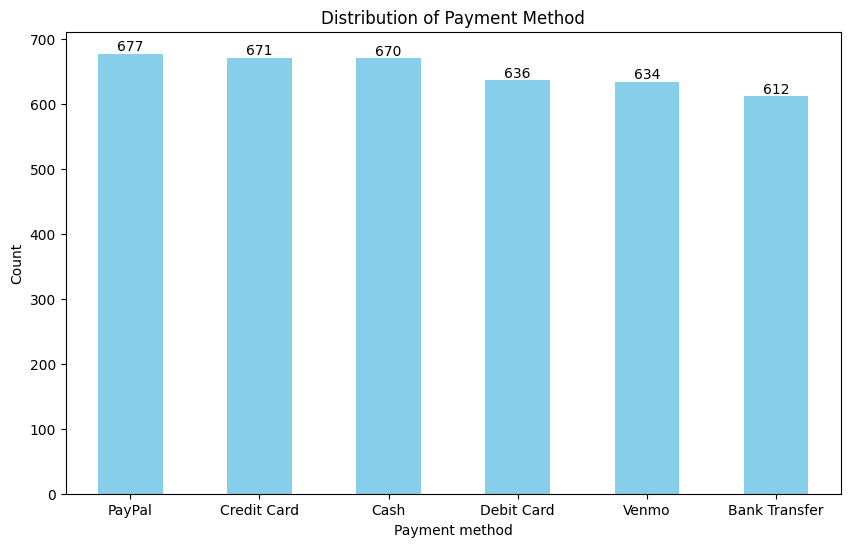

In [33]:
#create a variabel
payment_count=data['Payment Method'].value_counts()

#plotting
plt.figure(figsize=(10,6))
ax=payment_count.plot(kind='bar',color='skyblue')
plt.title('Distribution of Payment Method')
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.xticks(rotation=0)

#annotation
for p in ax.patches:
  height=p.get_height()
  width=p.get_width()
  x=p.get_x()
  ax.annotate(text=str(height),xy=(x+width/2.,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.show()

### Frequency of Purchases

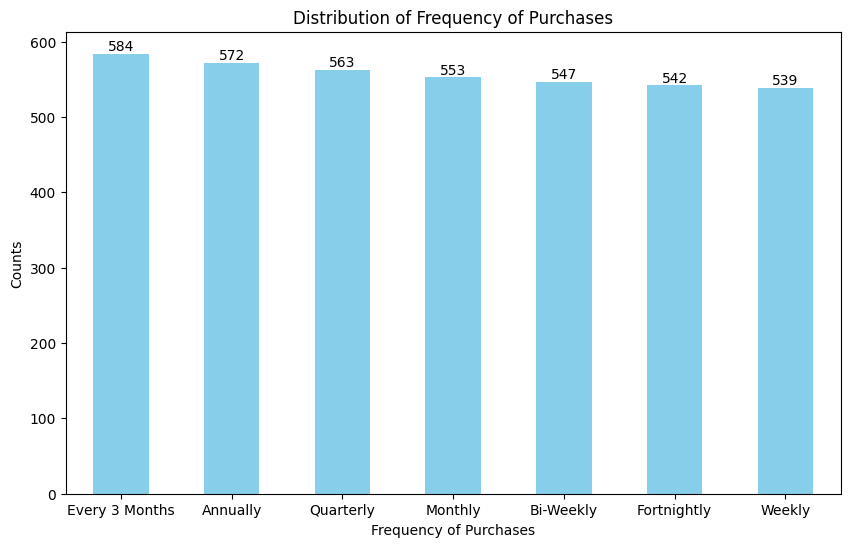

In [34]:
frequency_counts=data['Frequency of Purchases'].value_counts()

plt.figure(figsize=(10,6))
ax=frequency_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution of Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for p in ax.patches:
  height=p.get_height()
  width=p.get_width()
  x=p.get_x()
  ax.annotate(text=str(height),xy=(x+width/2.,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.show()

## Bivariate Analysis
Bivariate analysis is a statistical method used in data analysis and statistics to understand the relationship between two different variables. It involves examining the association, correlation, or interaction between two variables to determine how they are related. Here are some key points about bivariate analysis:


Two Variables: Bivariate analysis focuses on two variables at a time. These variables can be of different types, such as numerical and categorical, and they may represent different aspects of a dataset.


Purpose: The primary purpose of bivariate analysis is to investigate the relationship between the two variables. It helps answer questions like: Does a change in one variable affect the other? Are the variables related in some way?


Types of Bivariate Analysis:







> 1. Numerical-Numerical: When both variables under consideration are numerical, you can perform statistical tests like correlation analysis to measure the strength and direction of the linear relationship between them.

 >>>Hypotheses:
 >>Null Hypothesis (H0): The two categorical variables are independent (no association).
Alternative Hypothesis (Ha): The two categorical variables are dependent (there is an association).

 >>>If p-values ≤α(chi-square), it is considered statistically significant, and you reject the null hypothesis in favor of the alternative hypothesis.
 If p-values>α(chi-square), you fail to reject the null hypothesis.

 >>> P-Value: The p-value associated with the chi-squared statistic tells you the probability of observing such an extreme result if the variables were independent. A small p-value (typically < 0.05) indicates evidence against the null hypothesis.


> 2. Categorical-Categorical: When both variables are categorical, you can use methods like contingency tables and chi-squared tests to determine if there's an association or dependence between them.

> 3. Numerical-Categorical: When one variable is numerical and the other is categorical, you can use techniques like t-tests or analysis of variance (ANOVA) to compare means or distributions of the numerical variable across different categories of the categorical variable.

> 4. Time Series Analysis: In some cases, bivariate analysis can involve the analysis of two time series variables to study patterns and dependencies over time.

Visualization: Bivariate analysis often involves creating visualizations to better understand the relationship. Common visualizations include scatter plots for numerical-numerical relationships and bar charts or stacked bar charts for categorical-categorical relationships.

Hypothesis Testing: In some cases, bivariate analysis may include hypothesis testing to determine if the observed relationship between the two variables is statistically significant.

Limitations: Bivariate analysis is limited to studying the relationship between two variables. If you want to explore the relationship between more than two variables simultaneously, you may need to perform multivariate analysis.

Bivariate analysis is a fundamental step in data analysis, and it provides valuable insights into how two variables are connected or if they have any meaningful relationship. It's often used to inform further analysis and decision-making in various fields, including statistics, economics, social sciences, and data science.

### Categorical to categorical

#### checking dataset using `.info()` to get which are typically object or categorical

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

#### Chi-test Squares

In [36]:

# Select the relevant columns from your DataFrame
selected_columns = ['Age_Groups', 'Gender', 'Item Purchased', 'Category', 'Location',
                    'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type',
                    'Discount Applied', 'Promo Code Used', 'Payment Method',
                    'Frequency of Purchases']
data_subset = data[selected_columns]

# Create an empty DataFrame to store the p-values
p_values_df = pd.DataFrame(index=data_subset.columns, columns=data_subset.columns)
chitest_df=pd.DataFrame(index=data_subset.columns, columns=data_subset.columns)
chitest_df
p_values_df

,Age_Groups,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
Age_Groups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subscription Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shipping Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


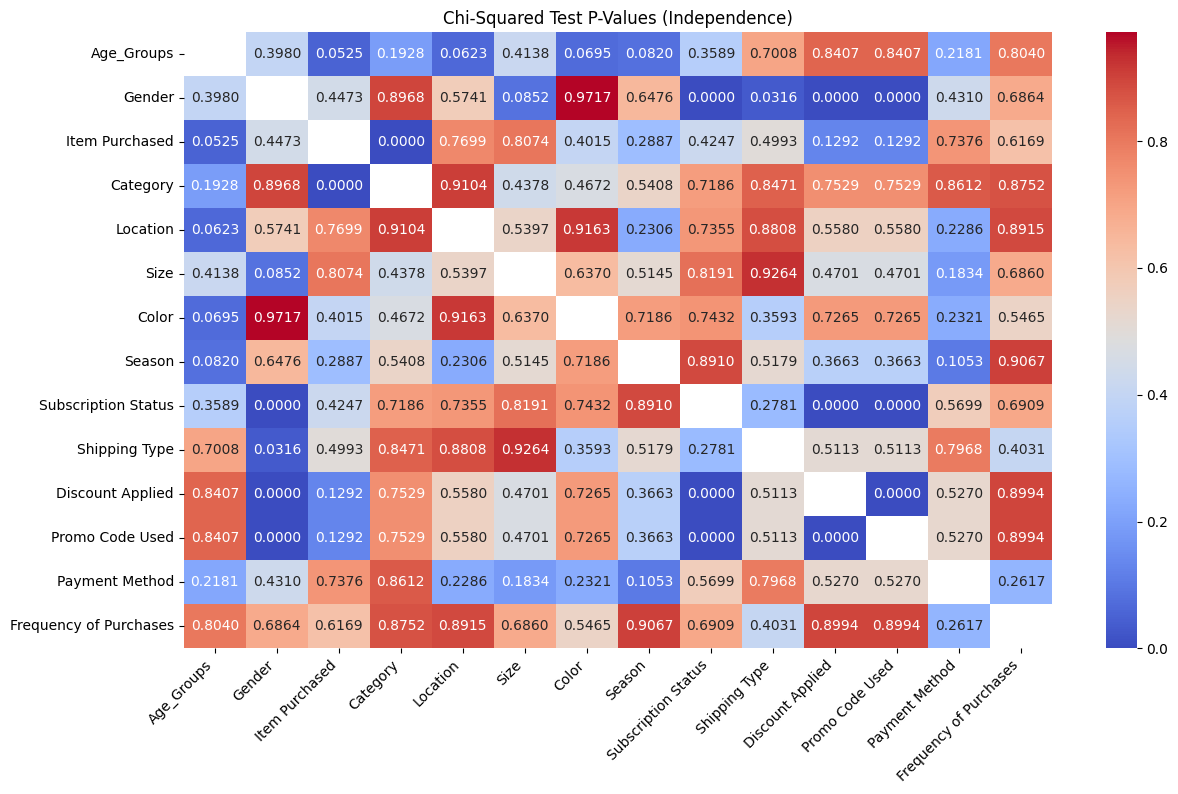

In [37]:
# Perform chi-squared test for each pair of columns
for col1 in data_subset.columns:
    for col2 in data_subset.columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(data_subset[col1], data_subset[col2])

            # Perform chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the DataFrame
            p_values_df.loc[col1, col2] = p
            chitest_df.loc[col1,col2]=chi2


# Convert p-values to numeric values
p_values_df = p_values_df.apply(pd.to_numeric)


# Create a heatmap of p-values
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(p_values_df, cmap='coolwarm', annot=True, fmt=".4f", cbar=True)

# Show column and row labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

plt.title("Chi-Squared Test P-Values (Independence)")
plt.show()


In [38]:
significant_p_values_df=p_values_df[p_values_df<=0.05]
significant_p_values_df

,Age_Groups,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
Age_Groups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.326863e-149,0.031607,1.764538e-302,1.764538e-302,NaN,NaN
Item Purchased,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subscription Status,NaN,3.326863e-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
Shipping Type,NaN,3.160742e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### change type of `chitest_df` from object to numeric

In [39]:
chitest_df.dtypes
chitest_df=chitest_df.apply(pd.to_numeric)

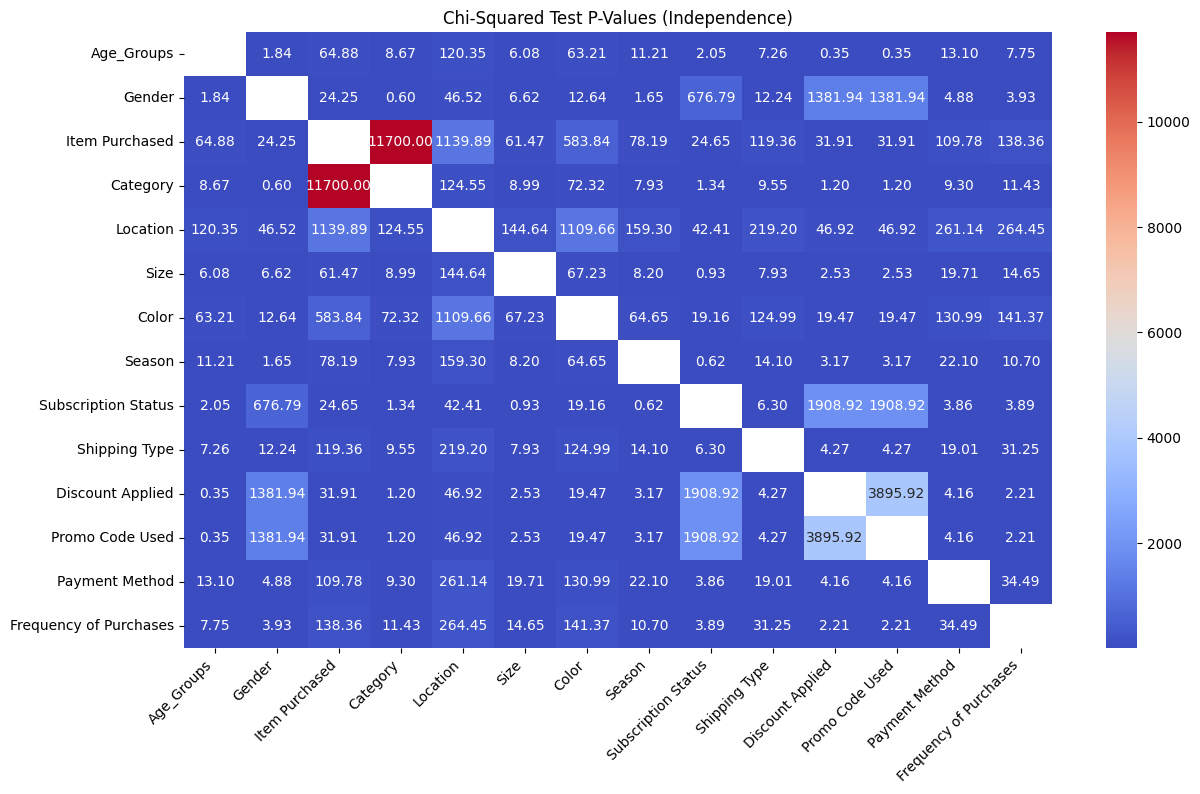

In [40]:
# Create a heatmap of p-values
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(chitest_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

# Show column and row labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

plt.title("Chi-Squared Test P-Values (Independence)")
plt.show()

### Numerical to numerical

<ipython-input-41-5025740a763c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


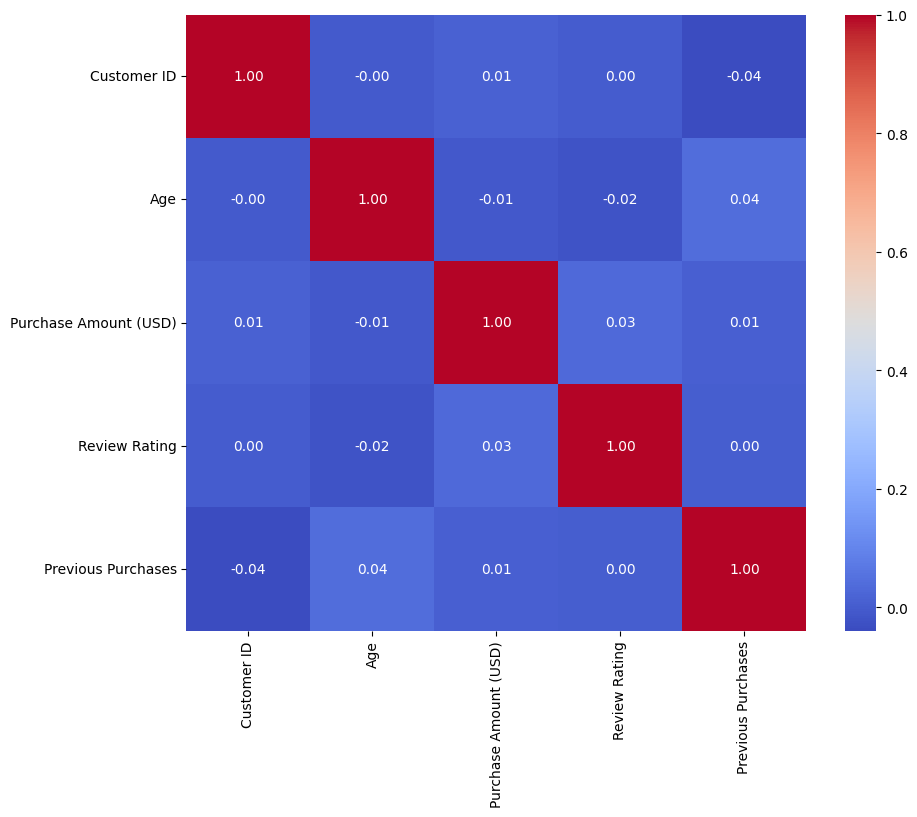

In [41]:
corr=data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Numerical to Categorical, vice versa

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Age_Groups              3900 non-null   object 
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

In [43]:

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(numerical_columns, '========================================',categorical_columns)


Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object') ======================================== Index(['Age_Groups', 'Gender', 'Item Purchased', 'Category', 'Location',
       'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [44]:
databaru=[data['Review Rating'][data['Gender']==cat] for cat in data['Gender'].unique()]
databaru

[0       3.1
 1       3.1
 2       3.1
 3       3.5
 4       2.7
        ... 
 2647    3.3
 2648    3.9
 2649    3.9
 2650    4.2
 2651    4.6
 Name: Review Rating, Length: 2652, dtype: float64,
 2652    3.3
 2653    4.8
 2654    4.1
 2655    3.4
 2656    3.6
        ... 
 3895    4.2
 3896    4.5
 3897    2.9
 3898    3.8
 3899    3.1
 Name: Review Rating, Length: 1248, dtype: float64]

In [45]:
# Perform pairwise ANOVA
results = []

for num_column in numerical_columns:
    for cat_column in categorical_columns:
        # Create groups for the ANOVA test
        groups = [data[num_column][data[cat_column] == category] for category in data[cat_column].unique()]
        #loops all data num_column to each unique value in cat_columns one by one

        # Perform ANOVA
        f_statistic, p_value = f_oneway(*groups)

        # Store the results
        results.append({
            'Numerical Variable': num_column,
            'Categorical Variable': cat_column,
            'F-Statistic': f_statistic,
            'P-Value': p_value
        })

# Convert the results to a DataFrame
anova_results = pd.DataFrame(results)

# Display the results
print(anova_results)


    Numerical Variable    Categorical Variable  F-Statistic   P-Value
0          Customer ID              Age_Groups     0.454973  0.634499
1          Customer ID                  Gender  7328.959913  0.000000
2          Customer ID          Item Purchased     1.439061  0.076461
3          Customer ID                Category     0.213278  0.887249
4          Customer ID                Location     1.017519  0.439715
..                 ...                     ...          ...       ...
65  Previous Purchases           Shipping Type     1.476730  0.193911
66  Previous Purchases        Discount Applied     2.160669  0.141664
67  Previous Purchases         Promo Code Used     2.160669  0.141664
68  Previous Purchases          Payment Method     0.560970  0.730030
69  Previous Purchases  Frequency of Purchases     1.593267  0.144793

[70 rows x 4 columns]


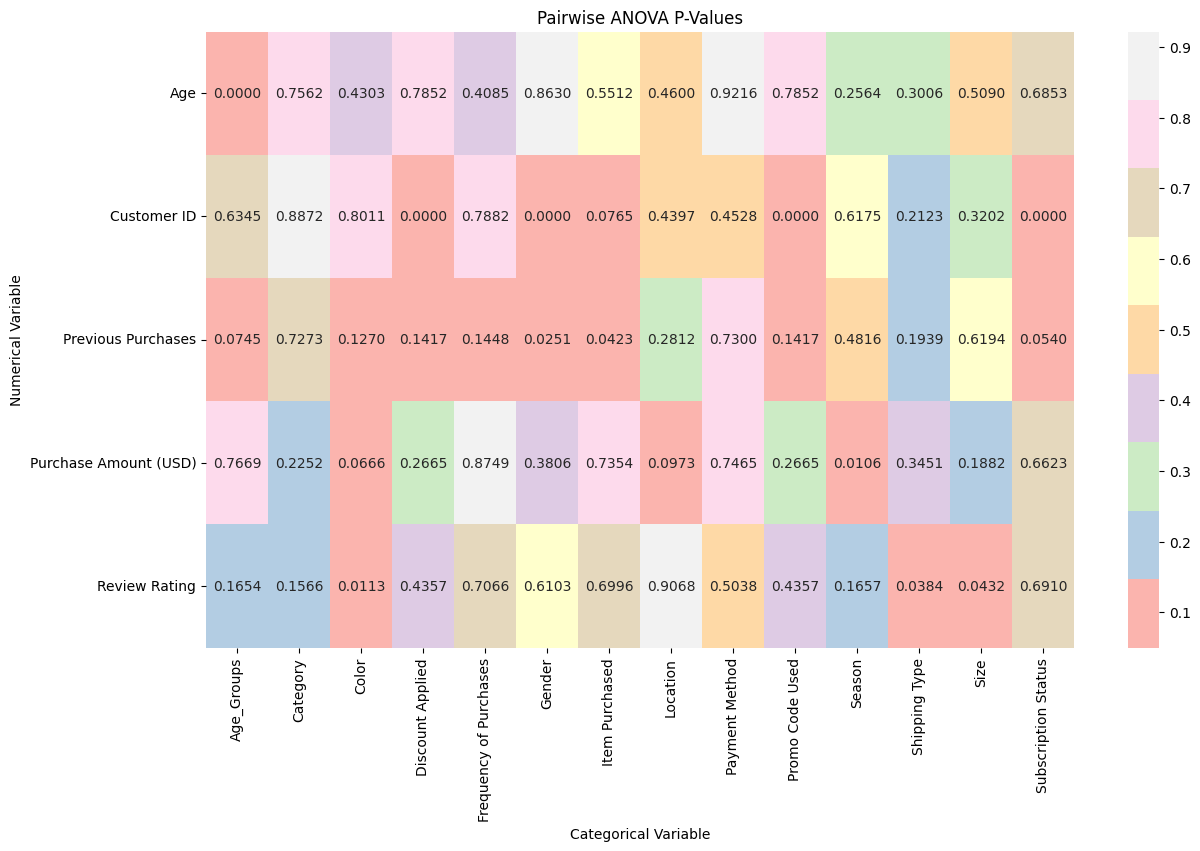

In [46]:

# Create a pivot table for the heatmap
heatmap_data = anova_results.pivot(index='Numerical Variable', columns='Categorical Variable', values='P-Value')



# Create the heatmap with the custom colormap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Pastel1', cbar=True, fmt=".4f",vmin=0.05)
plt.title('Pairwise ANOVA P-Values')
plt.show()


Significant ANOVA Results:
       Numerical Variable Categorical Variable   F-Statistic   P-Value
1             Customer ID               Gender   7328.959913  0.000000
8             Customer ID  Subscription Status   5639.559018  0.000000
10            Customer ID     Discount Applied  10828.107714  0.000000
11            Customer ID      Promo Code Used  10828.107714  0.000000
14                    Age           Age_Groups   7492.467980  0.000000
35  Purchase Amount (USD)               Season      3.746118  0.010576
47          Review Rating                 Size      2.716691  0.043155
48          Review Rating                Color      1.776577  0.011263
51          Review Rating        Shipping Type      2.352819  0.038365
57     Previous Purchases               Gender      5.022580  0.025075
58     Previous Purchases       Item Purchased      1.550787  0.042311

Non-Significant ANOVA Results:
       Numerical Variable    Categorical Variable  F-Statistic   P-Value
0             Cu

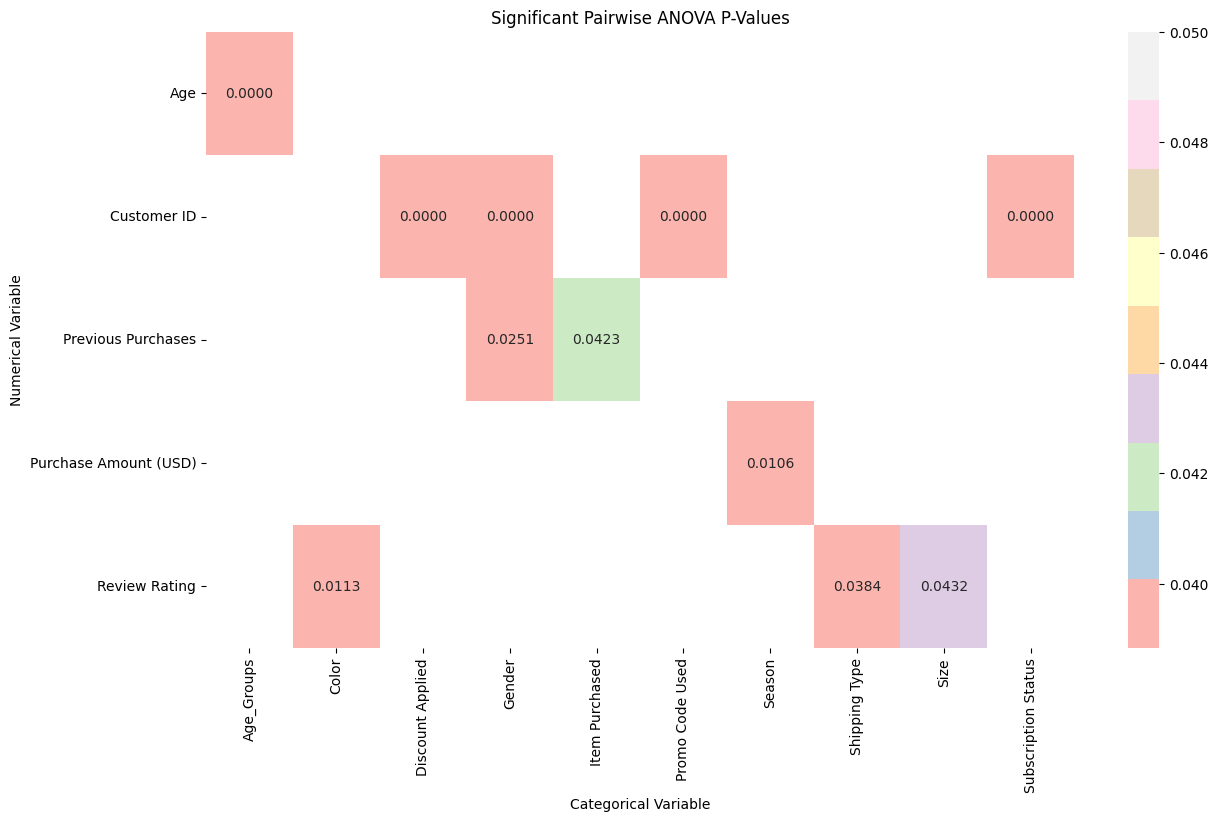

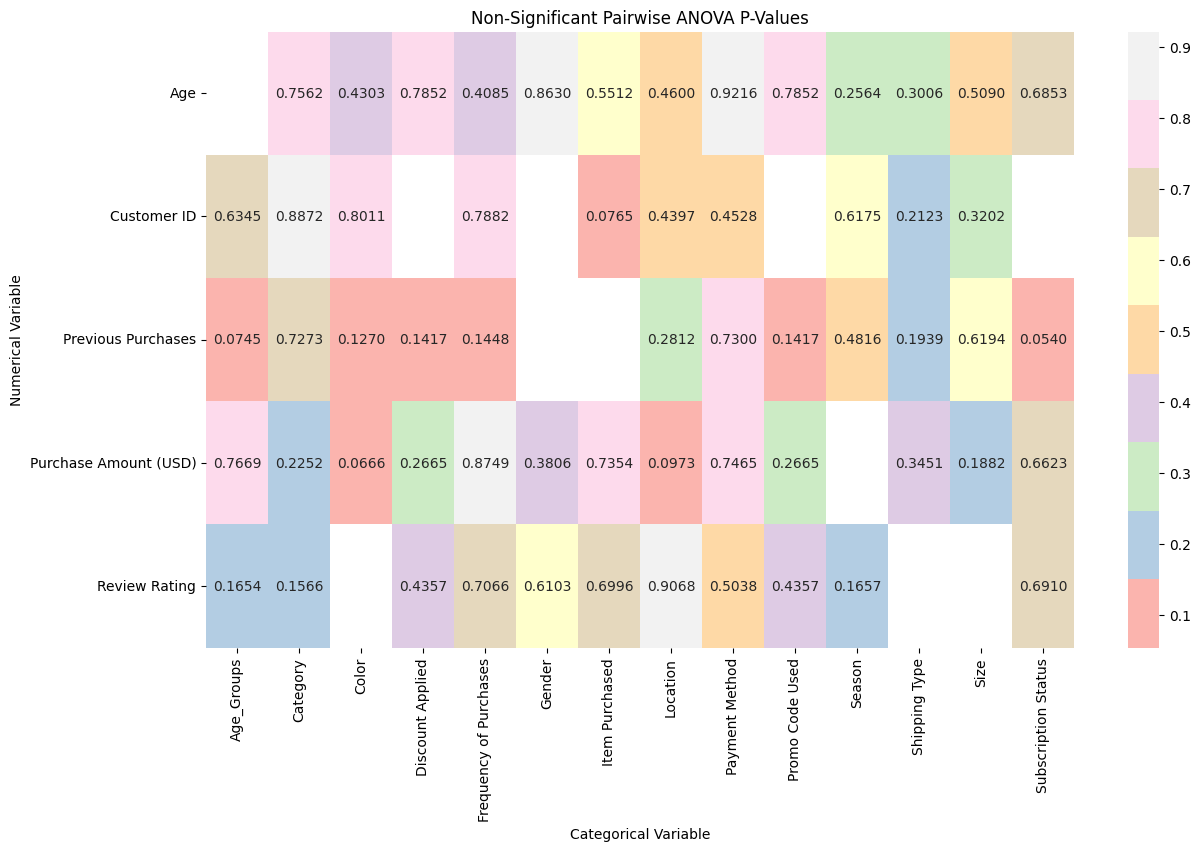

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


# Convert the results to a DataFrame
anova_results = pd.DataFrame(results)

# Separate ANOVA results into two DataFrames based on p-value threshold
significant_results = anova_results[anova_results['P-Value'] <= 0.05]
non_significant_results = anova_results[anova_results['P-Value'] > 0.05]

# Display the significant results
print("Significant ANOVA Results:")
print(significant_results)

# Display the non-significant results
print("\nNon-Significant ANOVA Results:")
print(non_significant_results)

# Create a pivot table for the heatmap of significant results
heatmap_data_significant = significant_results.pivot(index='Numerical Variable', columns='Categorical Variable', values='P-Value')

# Create a pivot table for the heatmap of non-significant results
heatmap_data_non_significant = non_significant_results.pivot(index='Numerical Variable', columns='Categorical Variable', values='P-Value')

# Create the heatmap with the custom colormap for significant results
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_significant, annot=True, cmap='Pastel1', cbar=True, fmt=".4f", vmin=0.05)
plt.title('Significant Pairwise ANOVA P-Values')
plt.show()

# Create the heatmap with the custom colormap for non-significant results
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_non_significant, annot=True, cmap='Pastel1', cbar=True, fmt=".4f")
plt.title('Non-Significant Pairwise ANOVA P-Values')
plt.show()


Purchase Amount (USD) vs season

rr vs size

rr vs color

rr vs shipping type

prev pur vs gender

prev pur vs item pur



#### Analysis Purchase Amount (USD) vs season

In [48]:
purchase_counts=data['Purchase Amount (USD)'].value_counts()
purchase_counts

94     62
32     62
36     62
51     61
90     60
       ..
100    36
87     35
49     35
69     34
61     33
Name: Purchase Amount (USD), Length: 81, dtype: int64

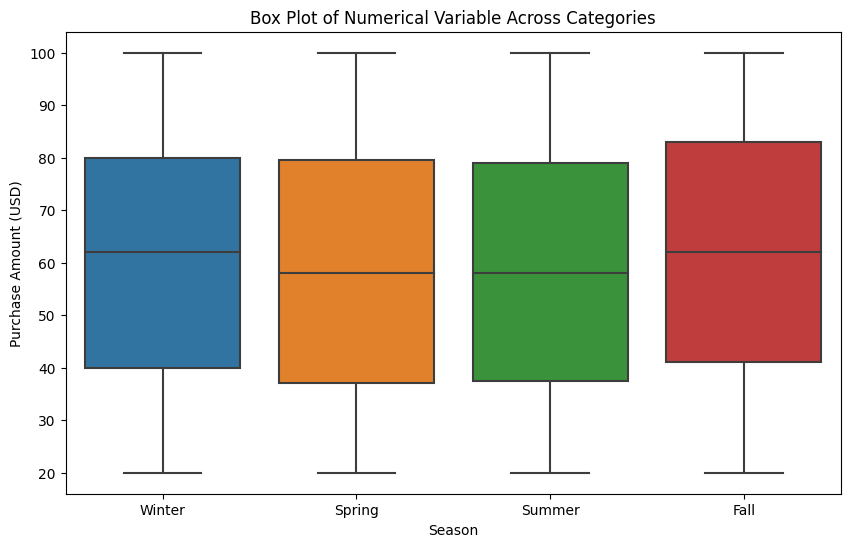

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=data)
plt.title('Box Plot of Numerical Variable Across Categories')
plt.show()


In [50]:
season_ct=data.groupby('Season')['Purchase Amount (USD)'].describe().sort_values(by='mean')
season_ct

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Summer,955.0,58.405236,23.470580,20.0,37.5,58.0,79.0,100.0
Spring,999.0,58.737738,23.935855,20.0,37.0,58.0,79.5,100.0
Winter,971.0,60.357364,23.475475,20.0,40.0,62.0,80.0,100.0
Fall,975.0,61.556923,23.745022,20.0,41.0,62.0,83.0,100.0


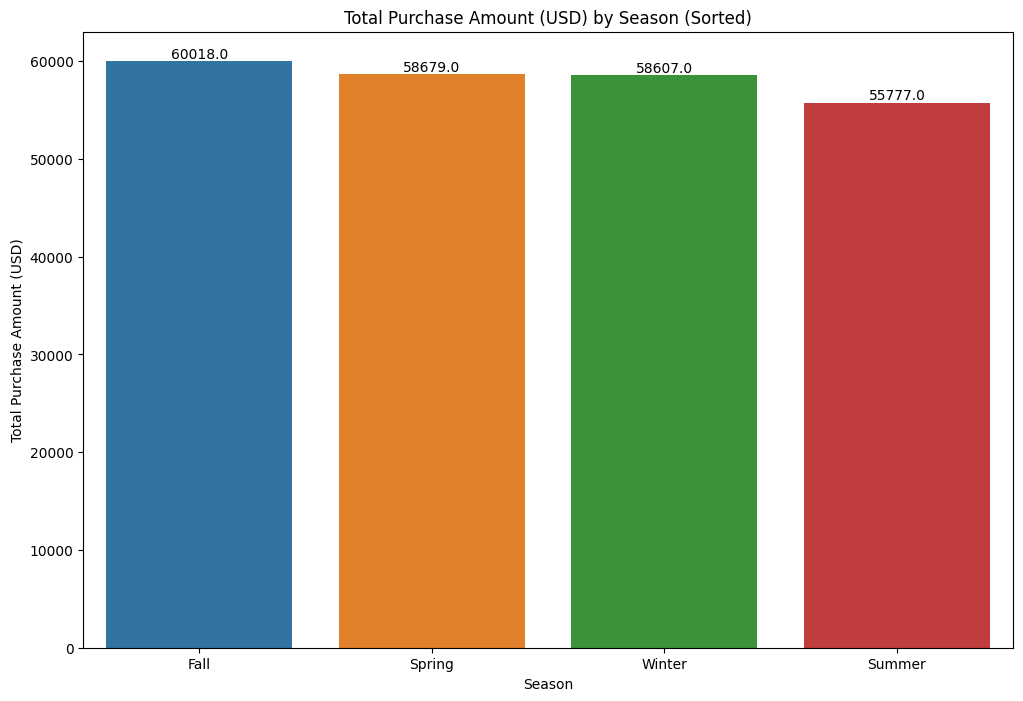

In [51]:

# Retrieve the sum of Purchase Amount (USD) for each season
season_purchase_sum = data.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

# Sort the DataFrame by Purchase Amount (USD) in descending order
season_purchase_sum_sorted = season_purchase_sum.sort_values(by='Purchase Amount (USD)', ascending=False)

# Visualize the data using a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_purchase_sum_sorted)

plt.title('Total Purchase Amount (USD) by Season (Sorted)')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    ax.annotate(text=str(height), xy=(x + width/2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


##### Insights
`Purchase Amount (USD)` Vs `Season`

1. Box plot:

it viz the mean both of it, top 1 is Fall with average purchase is 61,55 usd.

follows by winter season with average 60,35 usd.

last two are spring and winter with each are 58,73 and 58,40 usd.

2. barplot:

the highest total purchase is in fall season with 60018 usd

then follows by spring with 58679 usd

third is 58607 for winter season and last is summer season with 55777 usd.

#### Analysis Review rating vs Size, Color, and Shipping Type

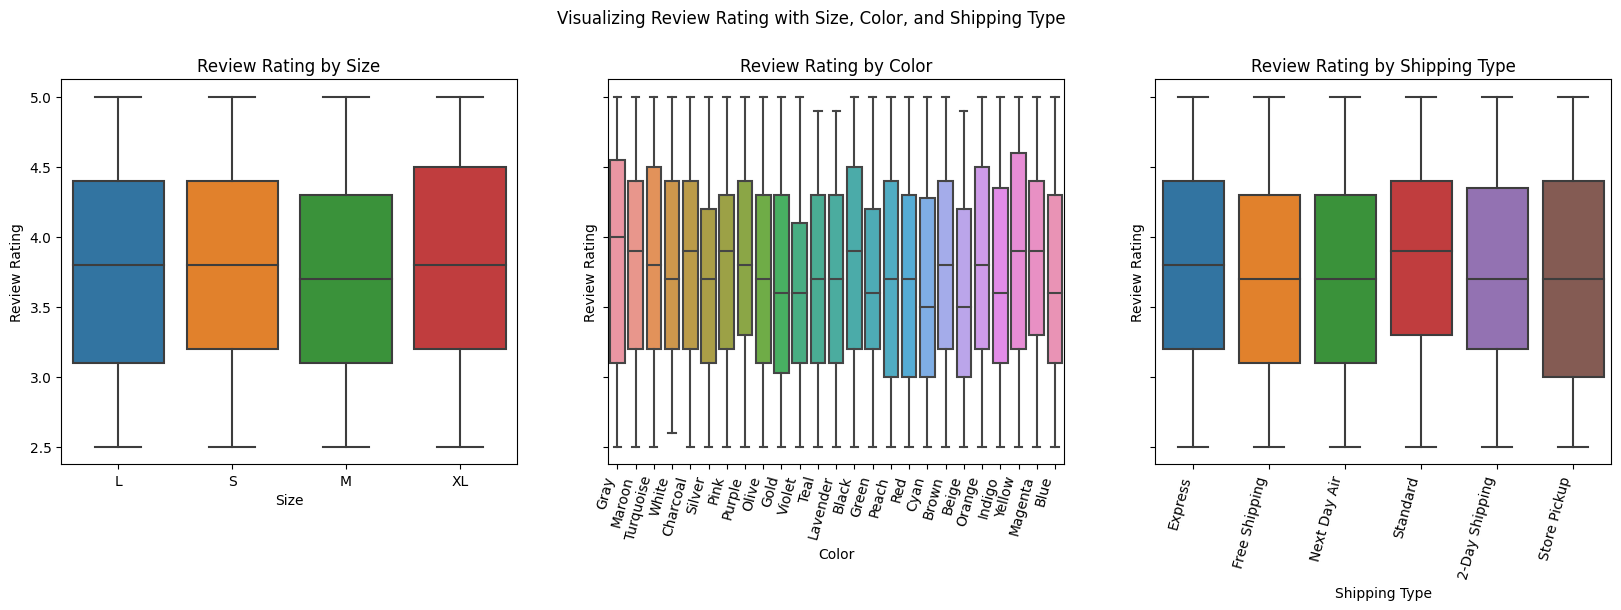

In [52]:

# Example: Visualizing Review Rating with Size, Color, and Shipping Type
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)

# Size
sns.boxplot(x='Size', y='Review Rating', data=data, ax=axes[0])
axes[0].set_title('Review Rating by Size')

# Color
sns.boxplot(x='Color', y='Review Rating', data=data, ax=axes[1])
axes[1].set_title('Review Rating by Color')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75, ha='right')  # Rotate x-axis labels
# Shipping Type
sns.boxplot(x='Shipping Type', y='Review Rating', data=data, ax=axes[2])
axes[2].set_title('Review Rating by Shipping Type')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=75, ha='right')  # Rotate x-axis labels
plt.suptitle('Visualizing Review Rating with Size, Color, and Shipping Type', y=1.02)
plt.show()


In [53]:
# Simplified code to retrieve review rating statistics by a categorical variable
def get_rating_stats(data, group_by_column):
    return data.groupby(group_by_column)['Review Rating'].agg(['mean', 'max', 'min']).sort_values('mean', ascending=False)

# Retrieve review rating statistics by size
rr_size = get_rating_stats(data, 'Size')

# Retrieve review rating statistics by color
rr_color = get_rating_stats(data, 'Color')

# Retrieve review rating statistics by shipping type
rr_shipping = get_rating_stats(data, 'Shipping Type')

# Print the DataFrames
print("Review Rating Statistics by Size:")
print(rr_size)

print("\nReview Rating Statistics by Color:")
print(rr_color)

print("\nReview Rating Statistics by Shipping Type:")
print(rr_shipping)


Review Rating Statistics by Size:
          mean  max  min
Size                    
XL    3.803497  5.0  2.5
S     3.793213  5.0  2.5
L     3.752707  5.0  2.5
M     3.718860  5.0  2.5

Review Rating Statistics by Color:
               mean  max  min
Color                        
Gray       3.880503  5.0  2.5
Yellow     3.864368  5.0  2.5
Magenta    3.840789  5.0  2.5
Black      3.840120  5.0  2.5
Orange     3.828571  5.0  2.5
Purple     3.821854  5.0  2.5
Pink       3.802614  5.0  2.5
Maroon     3.800633  5.0  2.5
Turquoise  3.798621  5.0  2.5
White      3.786620  5.0  2.6
Charcoal   3.783007  5.0  2.5
Brown      3.748936  5.0  2.5
Teal       3.737791  4.9  2.5
Peach      3.734899  5.0  2.5
Olive      3.724859  5.0  2.5
Silver     3.724855  5.0  2.5
Lavender   3.710884  4.9  2.5
Red        3.704730  5.0  2.5
Indigo     3.692517  5.0  2.5
Green      3.684615  5.0  2.5
Gold       3.670290  5.0  2.5
Blue       3.667763  5.0  2.5
Violet     3.653012  5.0  2.5
Cyan       3.626506  5.0  2.5


##### Insights
`Review Rating` Vs `Size`

shows that size XL has the highest review rating, with a score of 3.80 points.
Following closely, size S has a rating of 3.79 points.
The last two sizes, L and M, have ratings of 3.75 and 3.71 points, respectively.

`Review Rating` Vs `Color`

the highest mean review rating with 3.88 points is Grey.
Closely followed by Yellow with 3.86 points.

bottom 3 are Violet with	3.653012 points, Cyan with	3.626506 points, and Beige with	3.609524 points.

`Review Rating` Vs `Shipping Type`

Customer love to use Standard shipping type, then why it has become the highest review rating with 3.817 points.

followed by express shipping type with 3.776 points in the second place.

in the bottom, with a points 3.706 is store pickup shipping type.

#### Analysis Previous Purchases Vs Gender and Item Purchases

In [54]:
data['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [55]:
data['Previous Purchases']

0       14
1        2
2       23
3       49
4       31
        ..
3895    32
3896    41
3897    24
3898    24
3899    33
Name: Previous Purchases, Length: 3900, dtype: int64

In [56]:
prev_purchases=data.groupby('Gender')['Previous Purchases'].mean()
prev_purchases_percent=(prev_purchases/prev_purchases.sum())*100
prev_purchases_percent

Gender
Female    48.895835
Male      51.104165
Name: Previous Purchases, dtype: float64

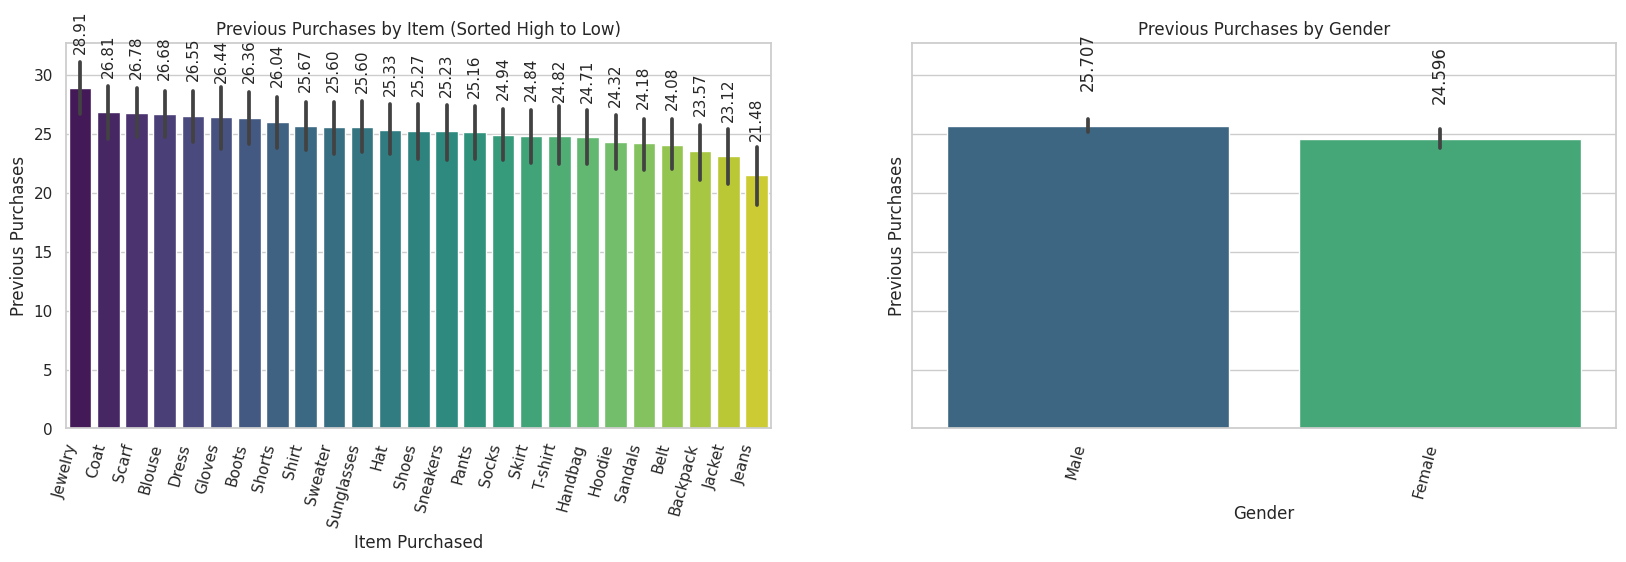

In [57]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Set the order for sorting
order = data.groupby('Item Purchased')['Previous Purchases'].mean().sort_values(ascending=False).index
prev_purchases=data['Previous Purchases'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharey=True)

# Create a bar plot with the specified order
ax1 = sns.barplot(x='Item Purchased', y='Previous Purchases', data=data, palette="viridis", order=order, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75, ha='right')
axes[0].set_xlabel('Item Purchased')
axes[0].set_ylabel('Previous Purchases')
axes[0].set_title('Previous Purchases by Item (Sorted High to Low)')

# Annotate each bar with its height value vertically for the first subplot
for p in ax1.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    ax1.annotate(
        text=f'{height:.2f}',
        xy=(x + width / 2., height),
        ha='center',
        va='bottom',
        rotation=90,fontsize=11,
        xytext=(0, 25),
        textcoords='offset points'
    )

# Create a bar plot for the second subplot
ax2 = sns.barplot(x='Gender', y='Previous Purchases', data=data, palette="viridis", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75, ha='right')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Previous Purchases')
axes[1].set_title('Previous Purchases by Gender')

# Annotate each bar with its height value vertically for the second subplot
for p in ax2.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    ax2.annotate(
        text=f'{height:.3f}',
        xy=(x + width / 2., height),
        ha='center',
        va='bottom',
        rotation=90,
        xytext=(0, 25),
        textcoords='offset points'
    )
#annotation
for i, p in enumerate(ax2.patches):
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    ax.annotate(f'{height}\n({prev_purchases_percent[i]:.2f}%)',xy=(p.get_x()+p.get_width()/2.,p.get_height()),
              ha='center',va='bottom',xytext=(0, 5),fontsize=8,textcoords='offset points')
plt.show()
# Show the plot
plt.show()


##### Insights

In the comparison between `Previous Purchases` and `Item Purchased`, customers who bought jewelry made an average of 28.91 previous purchases.

Following closely, customers who purchased coats made an average of 26.81 previous purchases, while those who bought scarves had an average of 26.78 previous items purchased

then,

in the other chart between `Previous Purchases` and `Gender`
shows that male had an average 25.707 purchases than female with 24.596 purchases.

`Previous Purchases` Vs `Item Purchased`

In [58]:
data

,Customer ID,Age,Age_Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Middle,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Young,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Middle,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Young,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Middle,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Middle,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Middle,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Middle,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Middle,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# Answer Questions

## 1 . what the season peak customer buy the product

peak season is can draw by
1. how many the customer buy
2. and how much income we get

In [59]:
#define new function to make process easy
def get_season_stats(data, group_by_column, aggregation_type):
    return data.groupby('Season')[group_by_column].agg(aggregation_type).sort_values(ascending=False)

season_purchase = get_season_stats(data, 'Purchase Amount (USD)', 'sum')
season_customer = get_season_stats(data, 'Customer ID', 'count')
print(season_purchase)
print(season_customer)



Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase Amount (USD), dtype: int64
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: Customer ID, dtype: int64


Based on the previous analysis, during the Fall season, the highest purchase amount was recorded at $60,018.

However, when comparing the number of customers (`Season Vs Customer ID`), Fall ranks second with 975 customers, trailing behind Spring with 999 customers. This reveals that while Spring has the highest customer count, Fall follows closely as the second-highest.

Winter and Summer both hold the third and fourth positions in both purchase amount and customer count.

So,

Peak season by customer count is Spring.

Peak season by purchase amount is Fall.

## 2 . what is the overall review rating of the product?


In [60]:
rr=data['Review Rating']

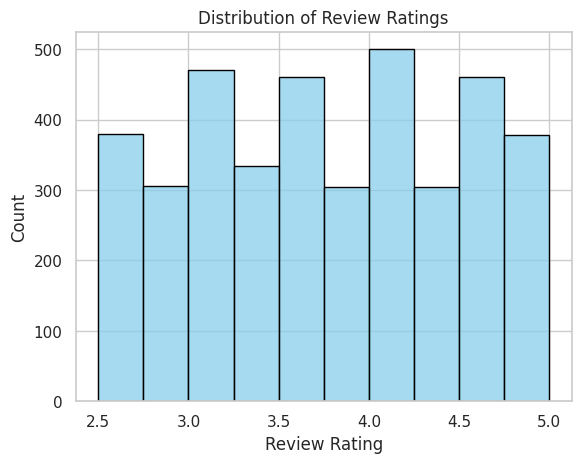

In [61]:

# Assuming 'Review Rating' is the column name in your DataFrame
rr = data['Review Rating']

# Create a histogram
sns.histplot(rr, bins=10, kde=False, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Distribution of Review Ratings')

# Show the plot
plt.show()


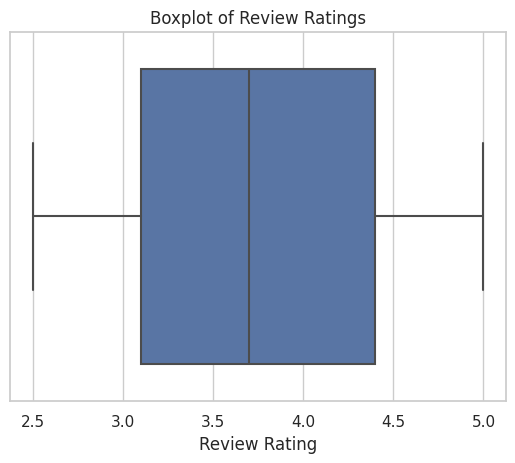

In [62]:

# Assuming 'Review Rating' is a column in your DataFrame
rr = data['Review Rating']

# Create a boxplot
sns.boxplot(x=rr)
plt.title('Boxplot of Review Ratings')
plt.show()


In [63]:
# define fuction `get stats` of min, mean, median, and max
def get_stats(data,columns):
  return data.agg(['min','mean','median','max'])

rrstat=get_stats(rr,'Review Rating')
rrstat

min       2.500000
mean      3.749949
median    3.700000
max       5.000000
Name: Review Rating, dtype: float64

Boxplot of `Review Rating` shows that

minimum value is 2.5

median value is    3.700000

mean value is 3.7499487179487176

maximum value is 5
so, overall the review rating is 3,74 points

## 3 . what the best product is? how about review rating and segmentation?

In [64]:
# Method 1 :
#retrieve data by the columns 'Category' and 'Item Purchased' then shows `Item Purchased Counts` and its `Review Rating`
# Assuming 'data' is your DataFrame
best_products = data.groupby('Category')['Item Purchased'].value_counts().reset_index(name='Item Purchased Counts')
rr_mean=data.groupby('Item Purchased')['Review Rating'].mean().reset_index(name='Review Rating')
best_products_rr=pd.merge(best_products,rr_mean,left_on='Item Purchased',right_on='Item Purchased',how='left')
best_products_rr


,Category,Item Purchased,Item Purchased Counts,Review Rating
0,Accessories,Jewelry,171,3.756140
1,Accessories,Belt,161,3.761491
2,Accessories,Sunglasses,161,3.744720
3,Accessories,Scarf,157,3.700000
4,Accessories,Hat,154,3.806494
5,Accessories,Handbag,153,3.775163
6,Accessories,Backpack,143,3.752448
7,Accessories,Gloves,140,3.864286
8,Clothing,Blouse,171,3.683626
9,Clothing,Pants,171,3.718713


In [65]:
# Method 2 :
#retrieve data by the columns 'Category' and 'Item Purchased' then shows `Item Purchased Counts` and its `Review Rating`
best_products_rr2 = data.groupby(['Category', 'Item Purchased']).agg({
    'Item Purchased': 'count',  # Count the occurrences of each item
    'Review Rating': 'mean'     # Calculate the mean review rating for each item
}).rename(columns={'Item Purchased': 'Item Purchased Counts'}).reset_index().sort_values('Item Purchased Counts',ascending=False)

# Display the result
print(best_products_rr2)

       Category Item Purchased  Item Purchased Counts  Review Rating
12     Clothing          Pants                    171       3.718713
8      Clothing         Blouse                    171       3.683626
5   Accessories        Jewelry                    171       3.756140
13     Clothing          Shirt                    169       3.629586
9      Clothing          Dress                    166       3.754819
17     Clothing        Sweater                    164       3.767073
24    Outerwear         Jacket                    163       3.763190
7   Accessories     Sunglasses                    161       3.744720
1   Accessories           Belt                    161       3.761491
23    Outerwear           Coat                    161       3.730435
20     Footwear        Sandals                    160       3.841250
16     Clothing          Socks                    159       3.750943
15     Clothing          Skirt                    158       3.782278
14     Clothing         Shorts    

In [66]:
# Assuming 'best_products' is your DataFrame
#Retrieve top 3 items and its review rating
top_3_items = best_products.groupby('Item Purchased Counts')['Item Purchased'].apply(lambda x: ', '.join(x)).reset_index()
top_3_items=top_3_items.sort_values('Item Purchased Counts',ascending=False)
top_3_items.head(3)


,Item Purchased Counts,Item Purchased
19,171,"Jewelry, Blouse, Pants"
18,169,Shirt
17,166,Dress


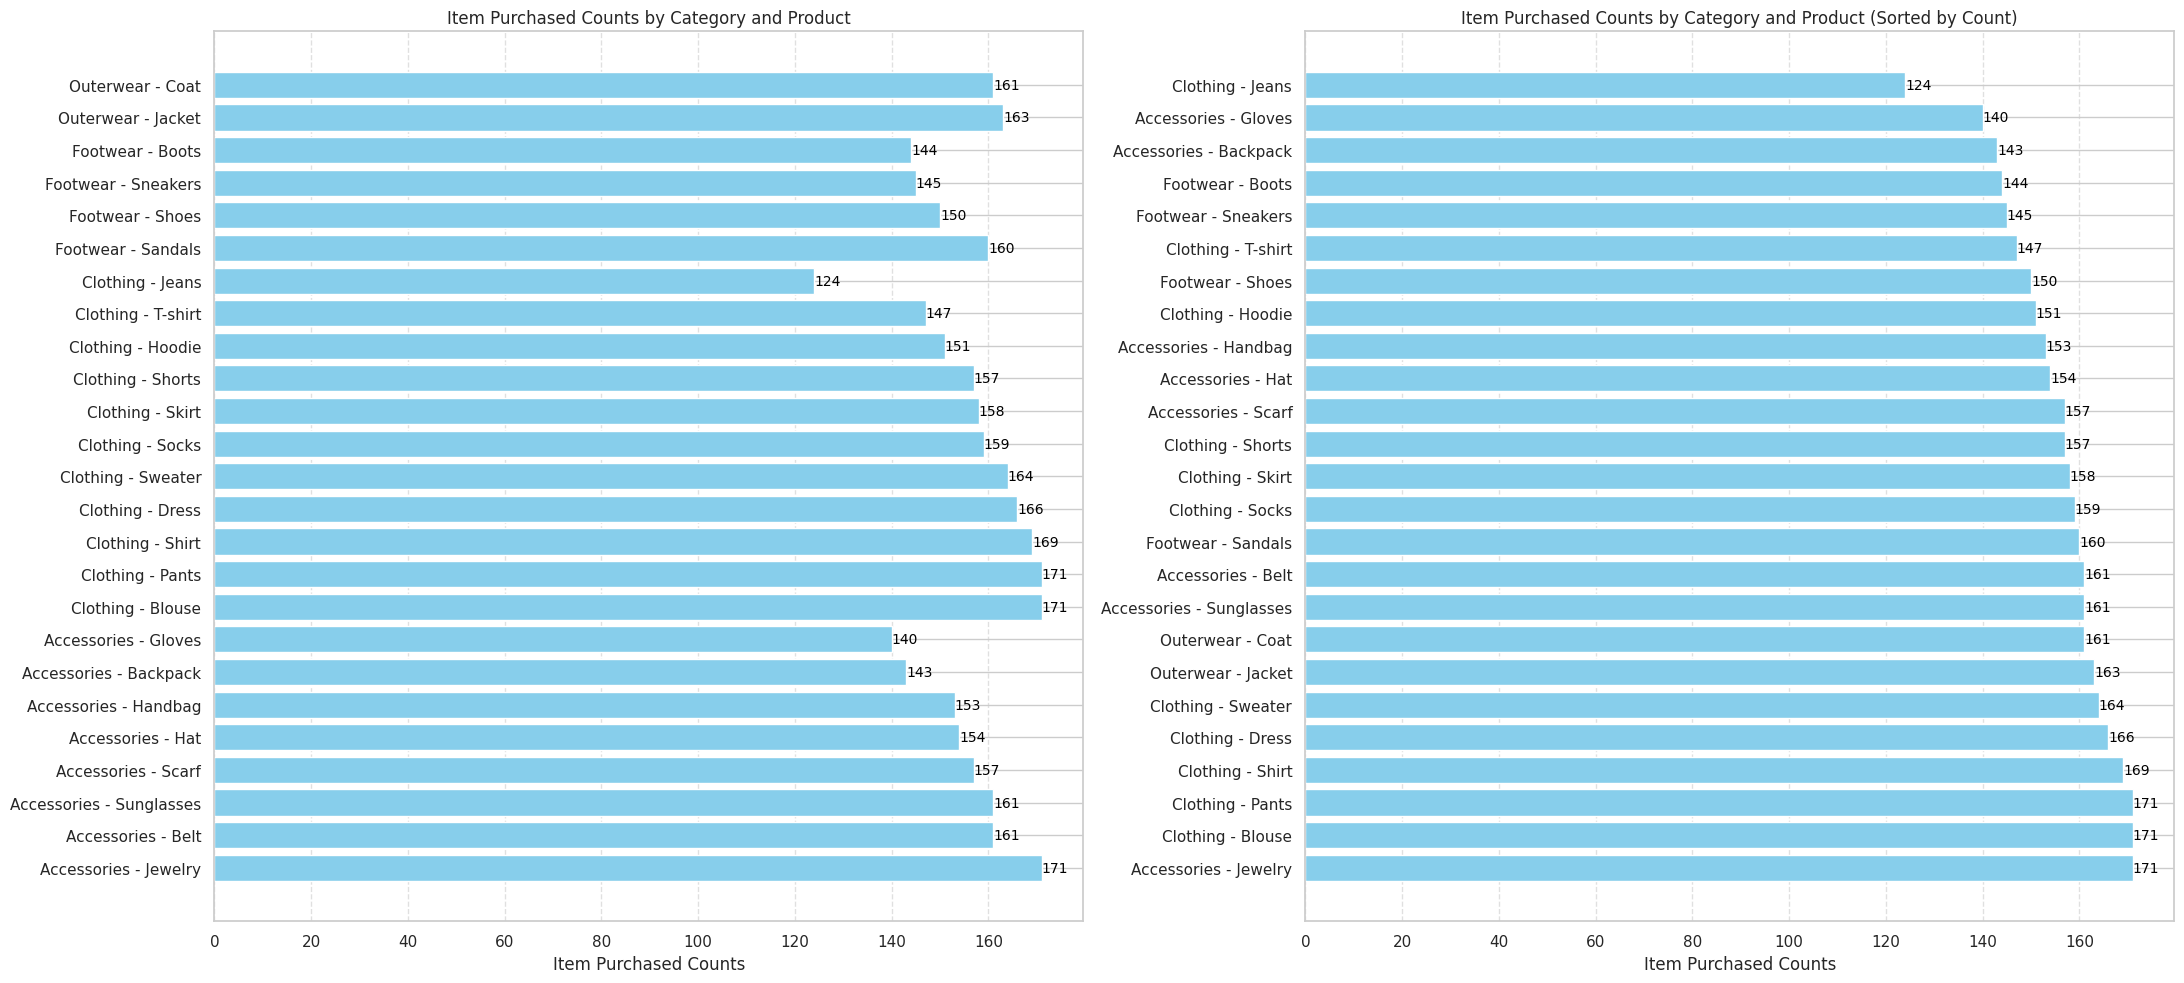

In [67]:
def plot_item_purchased_counts(ax, data, title, sort=False):
    if sort:
        data = data.sort_values(by='Item Purchased Counts', ascending=False)

    bars = ax.barh(range(len(data)), data['Item Purchased Counts'], color='skyblue')
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels([f"{row['Category']} - {row['Item Purchased']}" for _, row in data.iterrows()])
    ax.set_xlabel('Item Purchased Counts')
    ax.set_title(title)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    # Add annotations to each bar
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.0f}',  # Display the count with no decimal places
                va='center', ha='left', fontsize=10, color='black')

# Assuming 'best_products' is your DataFrame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))

# Plotting the first chart
plot_item_purchased_counts(axes[0], best_products_rr, 'Item Purchased Counts by Category and Product')

# Plotting the second chart (sorted)
plot_item_purchased_counts(axes[1], best_products_rr, 'Item Purchased Counts by Category and Product (Sorted by Count)', sort=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



The overall best-selling product is the one with the highest sales. Firstly, jewelry stands out as the top-performing product, having been sold 171 times, closely followed by blouse and pants, which share the same sales count.

In the second position, the shirt takes the lead with 169 purchases, and in the third position, the dress has achieved 166 sales.

When categorizing the best products based on their respective categories, the following details emerge:

1. In the Accessories category, the standout product is jewelry, boasting a remarkable 171 sales.

2. Within the Clothing category, the top-performing product is the blouse, also recording 171 sales.

3. The Footwear category sees sandals as the best product, with an impressive sales count of 160.

4. In the Outerwear category, the jacket takes the lead with 163 sales, solidifying its position as the best-selling product.

it seems best product in each categories isn't align with top 3 products across categories.

here are list of top 3 products across
1. Jewelry, Blouse, and Pants has a review rating 3.756
2. Shirt has a review rating 3.629
3. Dress has a review rating 3.754

## 4 . What is the repeat purchase rate for customers who gave a 4+ star review rating compared to those who gave lower ratings? is there any correlation high star review to behaviour repeat purchase?


Repeat Purchase Rate = (Number of Repeat Customers / Total Number of Customers) * 100

In [68]:
# Assuming 'data' is your DataFrame
repeat_customers = data[data['Previous Purchases'] > 1]['Customer ID'].nunique()
total_customers = data['Customer ID'].nunique()

repeat_purchase_rate = (repeat_customers / total_customers) * 100

print(f'Repeat Purchase Rate: {repeat_purchase_rate:.4f}%')
print(f'Non-Repeat Purchase Rate: {100-repeat_purchase_rate:.4f}%')

Repeat Purchase Rate: 97.8718%
Non-Repeat Purchase Rate: 2.1282%


In [69]:
rr_count = data[data['Review Rating'] >= 4]
percentage = (len(rr_count) / len(data)) * 100
print(f'Total customers with review rating more than 4 is {percentage:.2f}%')


Total customers with review rating more than 4 is 42.15%


In [70]:
def calculate_repeat_rate(data, rating_min, rating_max):

  # Filter data
  if rating_max == 5:
    repeat_rr = data[(data['Previous Purchases']>1) &
                      (data['Review Rating']>=rating_min)]
  else:
    repeat_rr = data[(data['Previous Purchases']>1) &
                      (data['Review Rating']>=rating_min) &
                      (data['Review Rating']<rating_max)]

  # Calculate percentage
  repeat_pct = (len(repeat_rr) / len(data)) * 100

  print(f"Repeat purchase rate for {rating_min}-{rating_max} ratings: {repeat_pct:.2f}%")

# Calculate for 4+ (no upper limit)
calculate_repeat_rate(data, 4, 5)

# Calculate for 3 to < 4
calculate_repeat_rate(data, 3, 4)

# Calculate for 2 to < 3
calculate_repeat_rate(data, 2, 3)

Repeat purchase rate for 4-5 ratings: 41.21%
Repeat purchase rate for 3-4 ratings: 39.33%
Repeat purchase rate for 2-3 ratings: 17.33%


In [71]:
repeat_rr=data[data['Previous Purchases']>1][['Customer ID','Review Rating','Previous Purchases']]
repeat_rr

,Customer ID,Review Rating,Previous Purchases
0,1,3.1,14
1,2,3.1,2
2,3,3.1,23
3,4,3.5,49
4,5,2.7,31
...,...,...,...
3895,3896,4.2,32
3896,3897,4.5,41
3897,3898,2.9,24
3898,3899,3.8,24


In [72]:
# Assuming 'data' is your DataFrame
repeat_rr['rr_range'] = repeat_rr['Review Rating'].apply(lambda x: '4-star' if x >= 4 else ('3-star' if x >= 3 else 'below 3-star'))

# Assuming 'data' is your DataFrame
repeat_rr['rr_range'] = repeat_rr['rr_range'].astype('category')

# Display the DataFrame with the new 'rr_range' column
repeat_rr.dtypes


Customer ID              int64
Review Rating          float64
Previous Purchases       int64
rr_range              category
dtype: object

<ipython-input-73-03e06d5bb93e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = repeat_rr.corr()


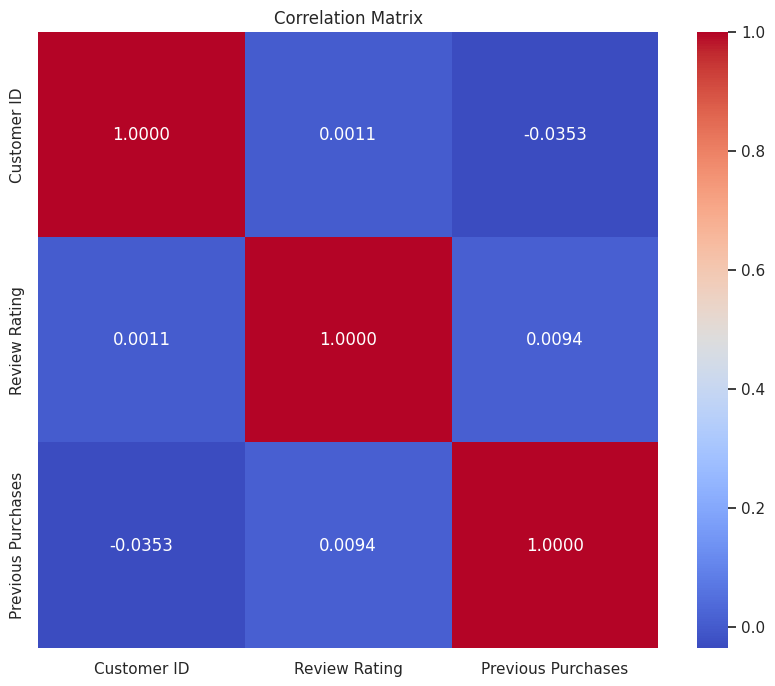

In [73]:

corr = repeat_rr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix')
plt.show()


The correlation between `Review Rating` and `Previous Purchases` is quite small, measuring at 0.0094. This means that when one variable changes, it doesn't really predict or influence changes in the other. Essentially, the connection between these two aspects is not very significant.

To dig deeper, I created a visualization using a scatter plot that shows the relationship between `Review Rating` and `Previous Purchases.` As you can see in the visualization, the correlation value aligns with the lack of a clear pattern between these two columns.

Customers who generously give 4-5 star ratings demonstrate a repeat purchase rate of 41.21%, indicating that a significant portion of them tends to make repeat purchases.

For those who provide ratings in the range of 3-4 stars, the repeat purchase rate is slightly lower at 39.33%. This suggests that a considerable portion of customers in this rating range also shows a tendency for repeat purchases.

On the other hand, customers giving ratings between 2.5-3 stars exhibit a lower repeat purchase rate of 17.33%, indicating a comparatively lower likelihood of making repeat purchases.

Higher star ratings generally correspond to higher repeat purchase rates, while lower star ratings correlate with a relatively lower likelihood of repeat purchase. In summary, even though the overall correlation is small, within specific rating ranges, there appears to be a correlation between higher review ratings and a higher likelihood of repeat purchases.




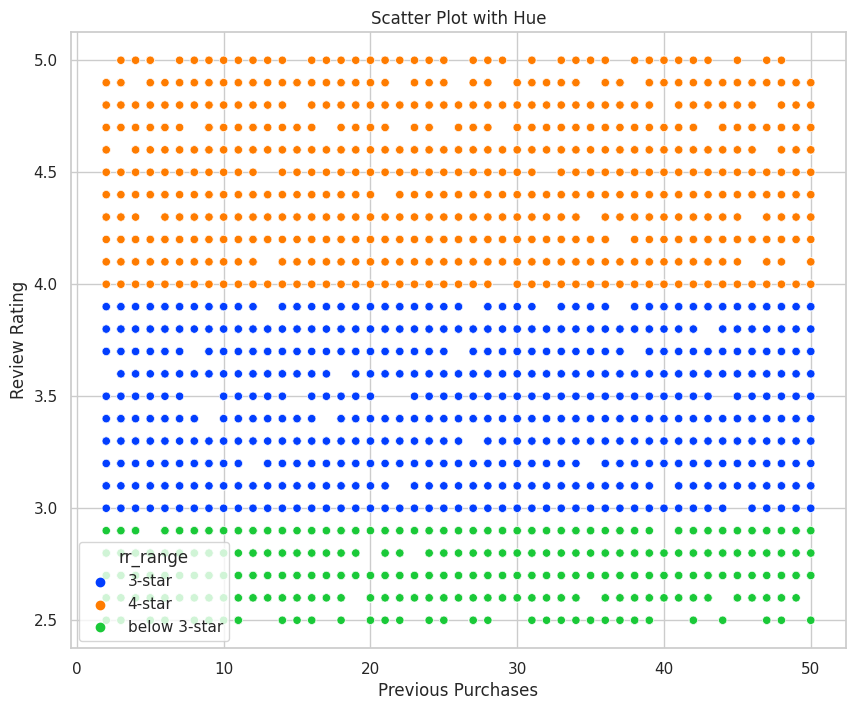

In [74]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Previous Purchases', y='Review Rating', hue='rr_range', data=repeat_rr, palette='bright')
plt.title('Scatter Plot with Hue')
plt.xlabel('Previous Purchases')
plt.ylabel('Review Rating')
plt.show()


## 5 . What are the top 5 item color and size combinations by total purchase amount? Knowing the best selling combinations can help optimize inventory levels.

In [75]:
data.columns
data['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [76]:
color_size=data.groupby(['Color','Size'])['Purchase Amount (USD)'].sum().reset_index().sort_values('Purchase Amount (USD)',ascending=False)
print(color_size.head(25))

       Color Size  Purchase Amount (USD)
89    Violet    M                   5449
53     Olive    M                   5121
29      Gray    M                   5090
17  Charcoal    M                   4661
93     White    M                   4585
57    Orange    M                   4513
33     Green    M                   4466
77    Silver    M                   4417
49    Maroon    M                   4295
61     Peach    M                   4249
45   Magenta    M                   4227
81      Teal    M                   4213
5      Black    M                   4128
37    Indigo    M                   4127
25      Gold    M                   3981
9       Blue    M                   3929
1      Beige    M                   3928
73       Red    M                   3924
41  Lavender    M                   3873
21      Cyan    M                   3866
69    Purple    M                   3839
13     Brown    M                   3821
65      Pink    M                   3712
97    Yellow    

In [77]:
#check which color isnt in top 25
# Convert the NumPy array to a Pandas Series
unique_colors_series = pd.Series(data['Color'].unique())

# Find missing colors
missing_colors = unique_colors_series[~unique_colors_series.isin(color_size['Color'].head(24))]

print(missing_colors)


2    Turquoise
dtype: object


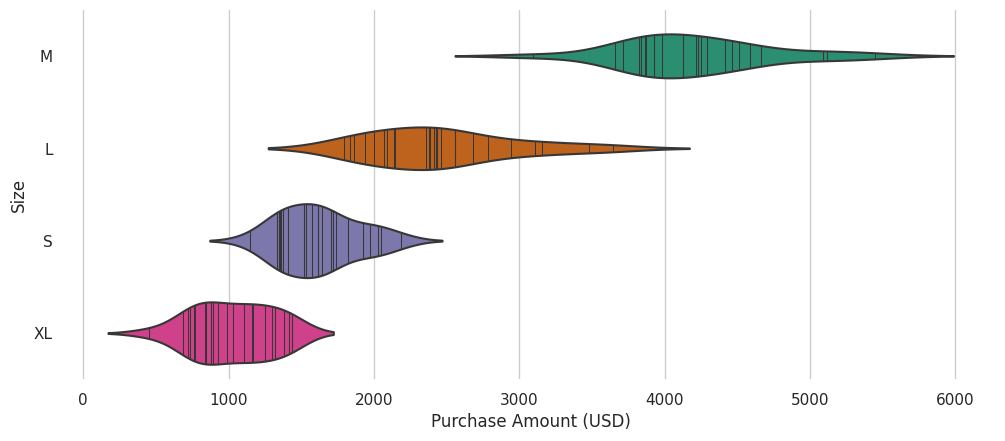

In [78]:

figsize = (12, 1.2 * len(color_size['Size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(color_size, x='Purchase Amount (USD)', y='Size', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The Color column encompasses 25 distinct colors, while the Size column comprises four different size types.

Upon examining the color_size data, I observed that the top 24 positions correspond to various colors, all sharing the same size—M. However, at position 25, a different size, namely L, is present. This prompted me to investigate which color is absent from the top 25 and has a size of M, revealing the color turquoise.

What caught my attention is the intriguing pattern within the top 25. Despite the diversity in color, all entries share a common size preference—M. This suggests a strong preference among customers for size M.

Here are the top 5 purchase amounts (USD) based on color and size:

1. Color Violet with size M has generated sales totaling $5449.

2. Color Olive with size M has contributed to sales amounting to $5121.

3. Color Gray with size M has resulted in sales reaching $5090.

4. Color Charcoal with size M has led to sales totaling $4661.

5. Color White with size M has achieved sales of $4585.

## 6 . What categories have the highest average order value? This identifies the most profitable categories to focus on.

In [79]:
cat_profit_total=data.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
cat_profit_total.sort_values('Purchase Amount (USD)',ascending=False)

,Category,Purchase Amount (USD)
1,Clothing,104264
0,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


In [80]:
cat_count=data.groupby('Category')['Customer ID'].count()
cat_count

Category
Accessories    1240
Clothing       1737
Footwear        599
Outerwear       324
Name: Customer ID, dtype: int64

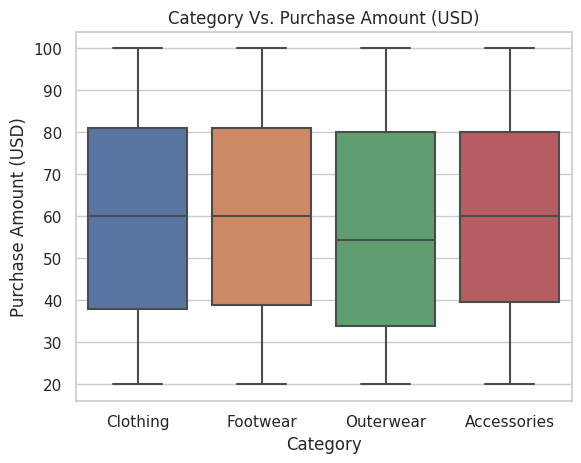

In [81]:
cat_profit=data[['Category','Purchase Amount (USD)']]
cat_profit
sns.boxplot(x='Category',y='Purchase Amount (USD)',data=cat_profit)

plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.title('Category Vs. Purchase Amount (USD)')

plt.show()

Purchase Amount by Category:

1. Clothing: Customers purchased Clothing items for a total amount of USD 104,264.

2. Accessories: Accessories contributed to a purchase amount of USD 74,200.

3. Footwear: Footwear items were purchased for a total of USD 36,093.

4. Outerwear: Outerwear products accounted for a purchase amount of USD 18,524.

Customer Count by Category:

1. Accessories: There are 1,240 customers who have purchased Accessories.

2. Clothing: The Clothing category has a customer count of 1,737.

3. Footwear: Footwear attracted 599 customers.

4. Outerwear: There are 324 customers who purchased Outerwear.

shows that highest customer will have highest purchase amount, low customer count will correlate to low purchase amount.


cause these columns are numerical and categorical,

so i did statistical test ANOVA to checking correlation between them. the result p-values is 0.2252

## 7 . What is the sales contribution percentage by payment method? It's important to know the payment method split.

In [82]:
# Retrieve purchase amount by payment method then sort it high to low
sales_payment_sort=data.groupby('Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending=False).reset_index(name='Purchase Amount (USD)')
print(sales_payment_sort)

  Payment Method  Purchase Amount (USD)
0    Credit Card                  40310
1         PayPal                  40109
2           Cash                  40002
3     Debit Card                  38742
4          Venmo                  37374
5  Bank Transfer                  36544


In [83]:
#Create a variable to get percentage of each purchase amount by payment method
total_sales_payment_sort=sales_payment_sort['Purchase Amount (USD)'].sum()
sales_payment_percent=((sales_payment_sort['Purchase Amount (USD)']/total_sales_payment_sort)*100)

print(f'Total sales is {total_sales_payment_sort} USD')
print(sales_payment_percent)

Total sales is 233081 USD
0    17.294417
1    17.208181
2    17.162274
3    16.621689
4    16.034769
5    15.678670
Name: Purchase Amount (USD), dtype: float64


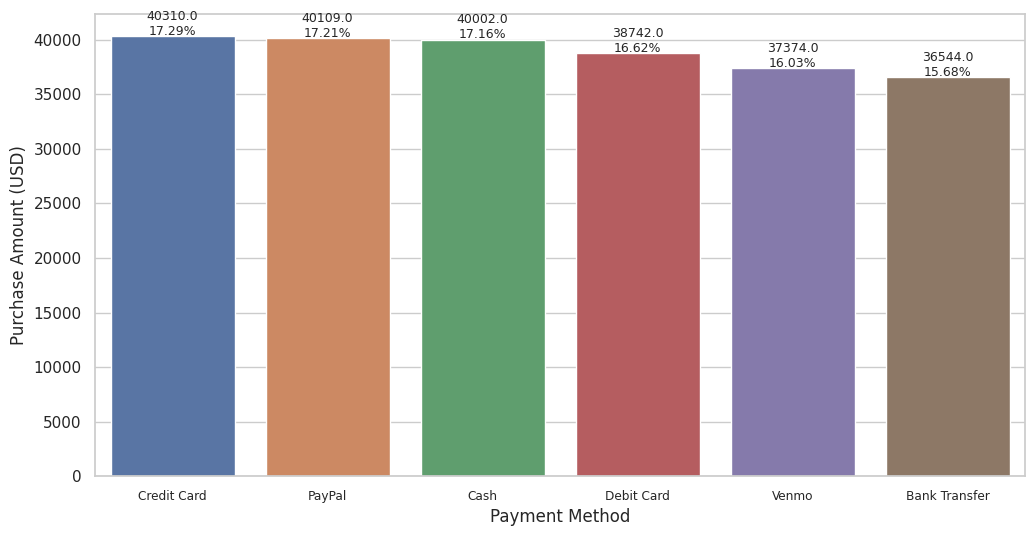

In [84]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Payment Method',y='Purchase Amount (USD)',data=sales_payment_sort)

plt.xticks(rotation=0,fontsize=8.7)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()

    ax.annotate(f'{height}\n{sales_payment_percent[i]:.2f}%', xy=(x + width/2., height),
                ha='center', va='center', xytext=(0, 8.9), fontsize=9, textcoords='offset points')

plt.show()


The total sales or `purchase amount` for the specified period is 233,081 USD.

The distribution of `payment methods` used for transactions is as follows:

1. Credit Card:

  Amount: 40,310 USD

  Percentage of Total Purchase Amount: 17.29%

2. PayPal:

  Amount: 40,109 USD

  Percentage of Total Purchase Amount: 17.21%
3. Cash:

  Amount: 40,002 USD

  Percentage of Total Purchase Amount: 17.16%
4. Debit Card:

  Amount: 38,742 USD

  Percentage of Total Purchase Amount: 16.62%
5. Venmo:

  Amount: 37,374 USD

  Percentage of Total Purchase Amount: 16.03%
6. Bank Transfer:

  Amount: 36,544 USD

  Percentage of Total Purchase Amount: 15.68%

## 8 . What is the average order value by location? Can help optimize inventory by location.

In [85]:
data['Location'].value_counts()
print(data.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(5))
print(data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5))

Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Name: Purchase Amount (USD), dtype: float64
Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase Amount (USD), dtype: int64


Average Purchase Amount (USD) by Location:

1. Alaska has the highest average purchase amount among the top 5 locations, with an average of $67.60.

2. Pennsylvania follows closely with an average purchase amount of $66.57.
3. Arizona, West Virginia, and Nevada also feature in the top 5 locations with their respective average purchase amounts.

Total Purchase Amount (USD) by Location:

1. Montana has the highest total purchase amount among the top 5 locations, accumulating a total of $5,784.

2. Illinois and California closely follow with total purchase amounts of 5,617 usd and 5,605 usd, respectively.
3. Idaho and Nevada are also among the top 5 locations with their respective total purchase amounts.

## 9 . What is the repeat vs new customer purchase split by season? Can indicate opportunities to focus marketing to new vs existing customers.

In [86]:
repeat_cust=data[data['Previous Purchases']>1]
new_cust=data[data['Previous Purchases']<=1]
repeat_cust.groupby('Season')['Previous Purchases'].value_counts()

Season  Previous Purchases
Fall    20                    28
        26                    28
        5                     27
        6                     26
        12                    25
                              ..
Winter  8                     14
        26                    14
        29                    14
        49                    13
        17                    12
Name: Previous Purchases, Length: 196, dtype: int64

In [87]:
#Retrieve data from originalsource then use copy syntax, so it wont affect original source
data_split=data[['Customer ID','Previous Purchases','Season']].copy()
#add new column and apply function lambda
data_split['Previous Purchases Range']=data_split['Previous Purchases'].apply(lambda x:'Repeat' if x>1 else 'Non-Repeat')
#grouping it and count it
data_split_count=data_split.groupby(['Season', 'Previous Purchases Range'])[['Customer ID']].count().reset_index()
data_split_count

,Season,Previous Purchases Range,Customer ID
0,Fall,Non-Repeat,21
1,Fall,Repeat,954
2,Spring,Non-Repeat,22
3,Spring,Repeat,977
4,Summer,Non-Repeat,22
5,Summer,Repeat,933
6,Winter,Non-Repeat,18
7,Winter,Repeat,953


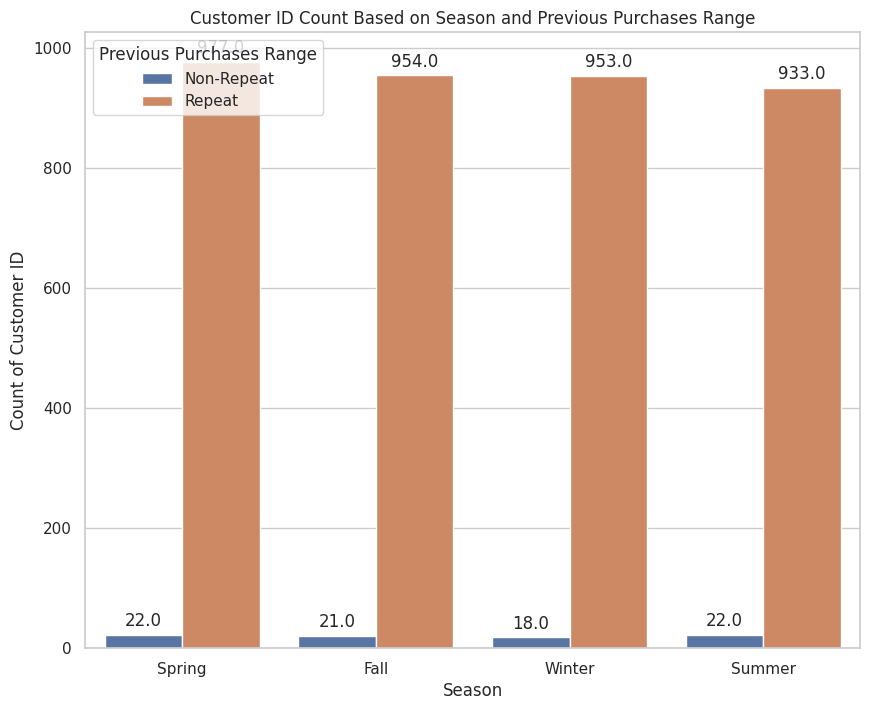

In [88]:
plt.figure(figsize=(10, 8))


# Using Seaborn's bar plot with order parameter for 'Repeat' category
ax = sns.barplot(x='Season', y='Customer ID', hue='Previous Purchases Range',
                 order=data_split_count[data_split_count['Previous Purchases Range'] == 'Repeat']
                       .sort_values(by='Customer ID', ascending=False)['Season'],
                 data=data_split_count)

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Count of Customer ID')
plt.title('Customer ID Count Based on Season and Previous Purchases Range')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2.
    ax.annotate(text=str(height), xy=(x, height), xytext=(0, 10), ha='center', va='center', textcoords='offset points')
# Display the plot
plt.show()

Based on the bar plot above, it is evident that the number of repeat customers is significantly higher than that of non-repeat customers.

1. The Spring season exhibits the highest customer count, with 977 repeat customers and 22 new customers.

2. Following closely is the Fall season, featuring 954 repeat customers and 21 new customers.

3. In the third position, the Winter season records 953 repeat customers and 18 new customers.

4. Lastly, the Summer season has 933 repeat customers and 22 new customers.

This analysis highlights the dominance of repeat customers across all seasons, with Spring having the highest overall customer engagement.
The analysis underscores the prevailing dominance of repeat customers across all seasons. Notably, Spring stands out with the highest overall customer engagement. This observation provides valuable insights into customer behavior and loyalty, crucial for shaping targeted marketing strategies and enhancing customer satisfaction.

## 10 . What categories have the highest review ratings on average? Helps identify strengths to leverage and weaknesses to improve.



In [89]:
cat_rr=data.groupby('Category')['Review Rating'].mean().reset_index(name='Mean of Review Rating')
cat_rr_sort=cat_rr.sort_values('Mean of Review Rating',ascending=False)
cat_rr_sort

,Category,Mean of Review Rating
2,Footwear,3.790651
0,Accessories,3.768629
3,Outerwear,3.746914
1,Clothing,3.723143


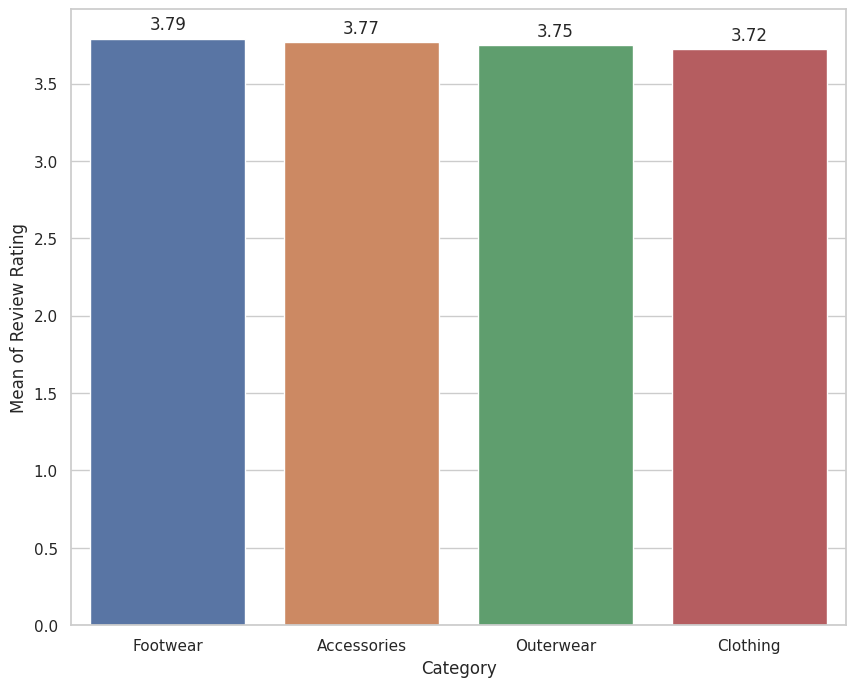

In [94]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Category", y="Mean of Review Rating", data=cat_rr_sort)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2.
    ax.annotate(text=f'{height:.2f}', xy=(x, height), xytext=(0, 10), ha='center', va='center', textcoords='offset points')

plt.show()



We observe that the above bar plot depicts four bars representing different categories.

In the first position, we find Footwear with a rating of 3.790651 stars, closely followed by Accessories with a rating of 3.768629 stars.

Outwear secures the third position with a rating of 3.746914 stars, and lastly, Clothing concludes with a rating of 3.723143 stars.

## 11 . What are the top categories by total purchase amount? This helps identify the highest selling categories to prioritize inventory.





In [108]:
cat_purchase_data=data.copy()
cat_purchase=cat_purchase_data.groupby("Category")["Purchase Amount (USD)"].sum().reset_index()
cat_purchase

,Category,Purchase Amount (USD)
0,Accessories,74200
1,Clothing,104264
2,Footwear,36093
3,Outerwear,18524


In [119]:
order_cat_purchase=cat_purchase.sort_values("Purchase Amount (USD)",ascending=False)
order_cat_purchase

,Category,Purchase Amount (USD)
1,Clothing,104264
0,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


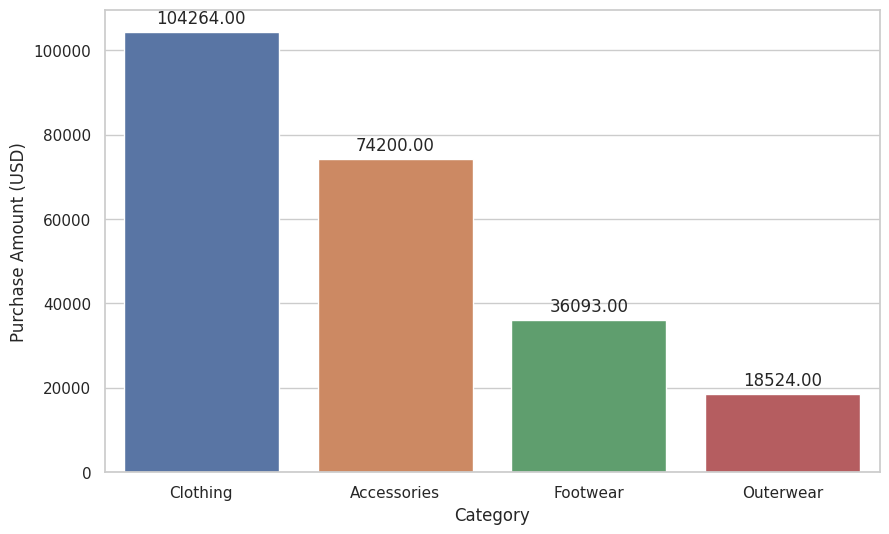

In [120]:

plt.figure(figsize=(10,6))
ax=sns.barplot(x="Category",y="Purchase Amount (USD)",order=order_cat_purchase['Category'],data=cat_purchase)
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2.
    ax.annotate(text=f'{height:.2f}', xy=(x, height), xytext=(0, 10), ha='center', va='center', textcoords='offset points')
plt.show()

1. Clothing Dominance:

  Clothing emerges as the dominant category with the highest purchase amount, totaling $104,264.
2. Accessories Significance:

  Accessories also contribute significantly to the overall purchase amounts, standing at $74,200.
3. Footwear and Outerwear Contributions:

  Footwear follows with a notable, though comparatively lower, purchase amount of $36,093.

  Outerwear represents a smaller but still considerable portion, with a purchase amount of $18,524.

## 12 . What is the average purchase amount by category and season? This can reveal trends to optimize assortment planning and inventory levels by season.


In [129]:
purchase_cat_sea_data=data.copy()
purchase_cat_sea=purchase_cat_sea_data.groupby(['Category','Season'])['Purchase Amount (USD)'].mean().reset_index(name='Mean of Purchase Amount')
purchase_cat_sea

,Category,Season,Mean of Purchase Amount
0,Accessories,Fall,61.339506
1,Accessories,Spring,56.501661
2,Accessories,Summer,60.987179
3,Accessories,Winter,60.366337
4,Clothing,Fall,61.405152
5,Clothing,Spring,60.995595
6,Clothing,Summer,56.563725
7,Clothing,Winter,60.879464
8,Footwear,Fall,63.713235
9,Footwear,Spring,58.619632


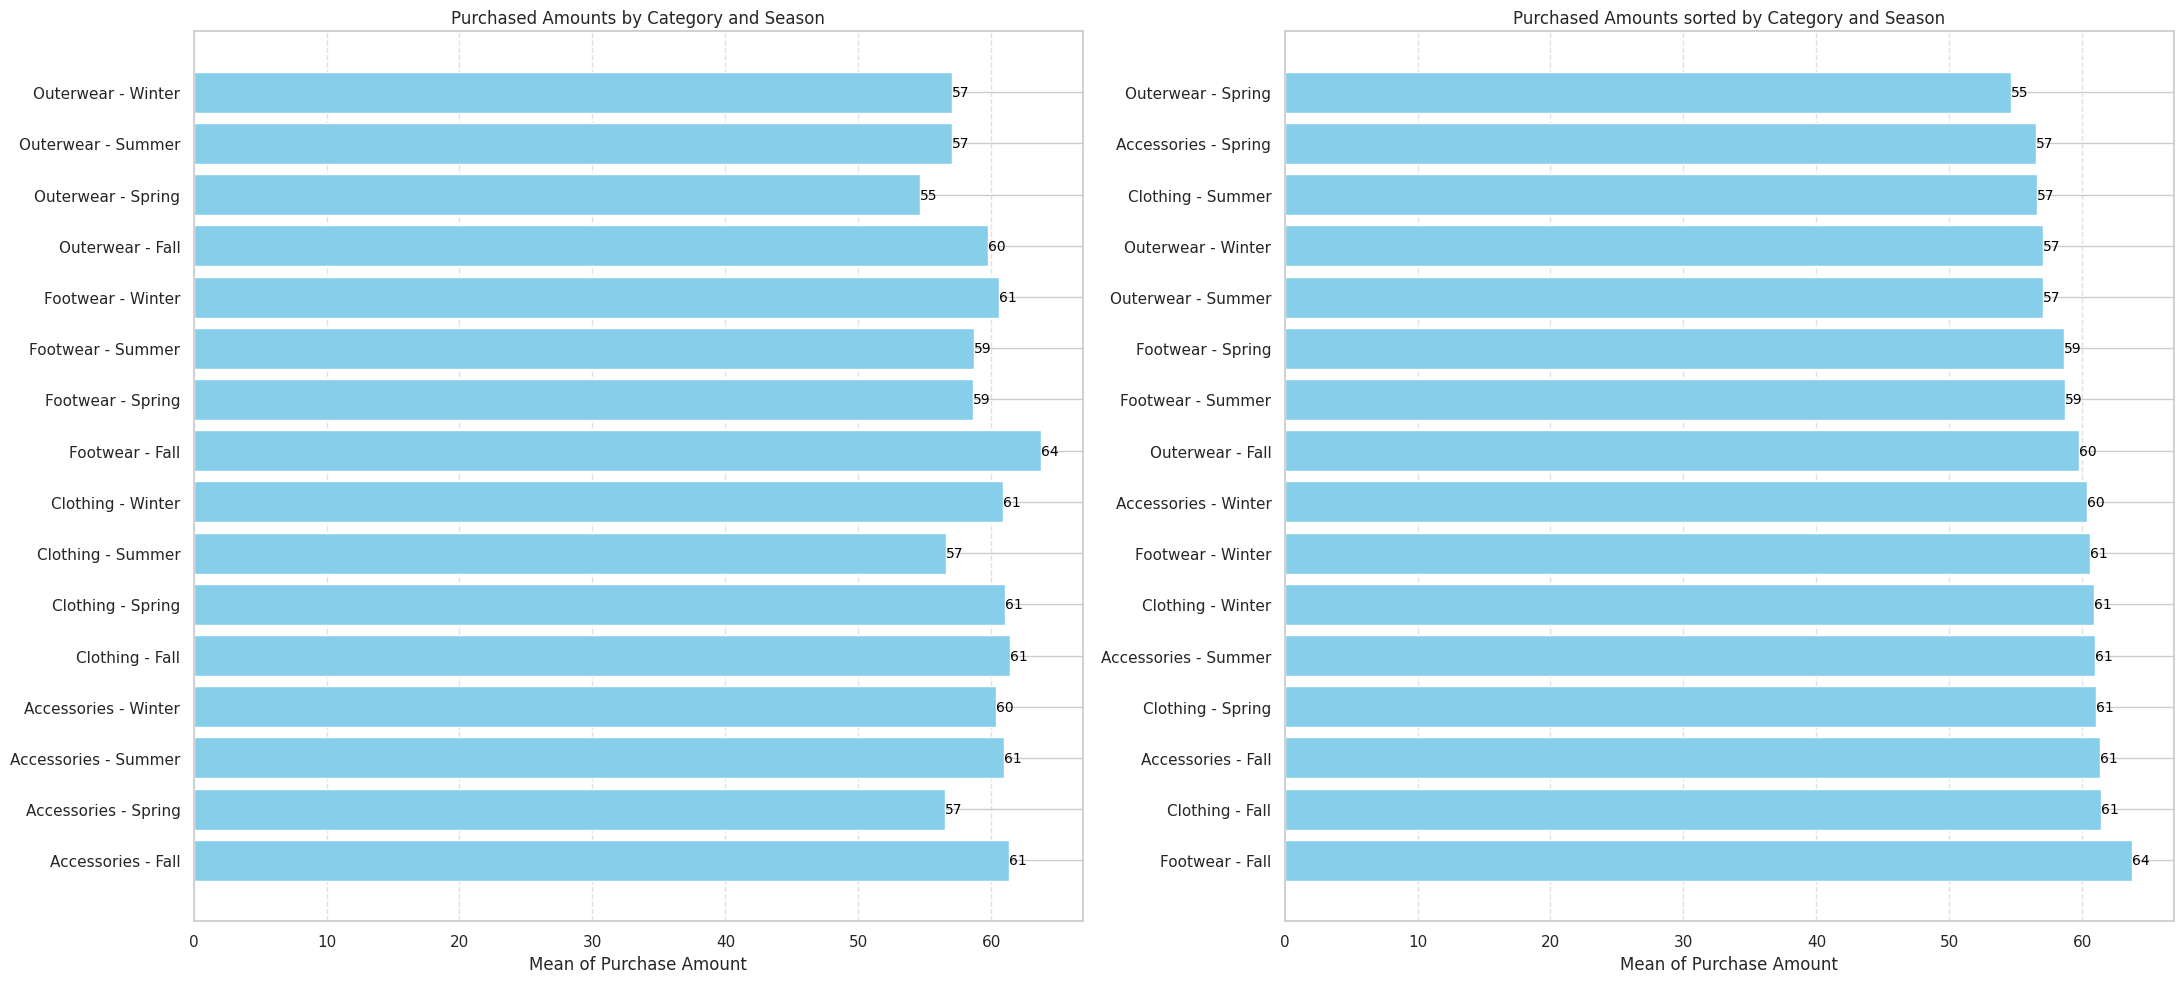

In [139]:
def plot_item_Mean_of_Purchase_Amounts(ax, data, title, sort=False):
    if sort:
        data = purchase_cat_sea.sort_values(by='Mean of Purchase Amount', ascending=False)

    bars = ax.barh(range(len(data)), data['Mean of Purchase Amount'], color='skyblue')
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels([f"{row['Category']} - {row['Season']}" for _, row in data.iterrows()])
    ax.set_xlabel('Mean of Purchase Amount')
    ax.set_title(title)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    # Add annotations to each bar
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.0f}',  # Display the count with no decimal places
                va='center', ha='left', fontsize=10, color='black')

# Assuming 'best_products' is your DataFrame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))

# Plotting the first chart
plot_item_Mean_of_Purchase_Amounts(axes[0], purchase_cat_sea, 'Purchased Amounts by Category and Season')

# Plotting the second chart (sorted)
plot_item_Mean_of_Purchase_Amounts(axes[1],purchase_cat_sea, 'Purchased Amounts sorted by Category and Season', sort=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


1. Category and Season Impact on Purchase Amounts:

  Accessories:

  Highest mean purchase amount in Fall ($61.34).
  Spring, Summer, and Winter also maintain substantial mean purchase amounts.

  Clothing:

  Fall and Winter exhibit higher mean purchase amounts compared to Spring and Summer.

  Footwear:

  Fall sees the highest mean purchase amount ($63.71).
  Spring and Winter maintain relatively consistent mean values, while Summer is slightly lower.

  Outerwear:

  Fall and Winter show higher mean purchase amounts compared to Spring and Summer.
2. Seasonal Variances:

  Across all categories, Fall tends to have higher mean purchase amounts, suggesting increased spending during this season.
  Spring and Winter also exhibit notable purchase amounts, while Summer shows relatively lower means.

## 13 . What percentage of purchases were made using a promo code versus not using one? This indicates how effective promotions are at driving sales.

In [147]:
promo_data=data.copy()
promo_data=promo_data.groupby('Promo Code Used')['Customer ID'].count()
promo_data_percent=(promo_data/promo_data.sum())*100
promo_data


Promo Code Used
No     2223
Yes    1677
Name: Customer ID, dtype: int64

Promo Code Utilization:

1. A total of 3,900 instances are observed.
2. Promo codes are used in 1,677 cases (43% of instances).
3. The majority of instances (2,223 or 57%) indicate that no promo code was employed.

# Question
1. what season is peak for customer buy the product?

2. what is the overall review rating of the product?

3. what the best product is? how about review rating and segmentation?

4. What is the repeat purchase rate for customers who gave a 4+ star review rating compared to those who gave lower ratings? This analyzes if higher customer satisfaction correlates to more repeat purchases.

5. What are the top 5 item color and size combinations by total purchase amount? Knowing the best selling combinations can help optimize inventory levels.

6. What categories have the highest average order value? This identifies the most profitable categories to focus on.

7. What is the sales contribution percentage by payment method? It's important to know the payment method split.

8. What is the average order value by location? Can help optimize inventory by location.

9. What is the repeat vs new customer purchase split by season? Can indicate opportunities to focus marketing to new vs existing customers.

10. What categories have the highest review ratings on average? Helps identify strengths to leverage and weaknesses to improve.

11. What are the top 10 categories by total purchase amount? This helps identify the highest selling categories to prioritize inventory.

12. What is the average purchase amount by category and season? This can reveal trends to optimize assortment planning and inventory levels by season.

13. What percentage of purchases were made using a promo code versus not using one? This indicates how effective promotions are at driving sales.


In [91]:
data

,Customer ID,Age,Age_Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Middle,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Young,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Middle,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Young,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Middle,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Middle,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Middle,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Middle,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Middle,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
